In [ ]:
pip freeze >> colab_frozen_packages_req.txt

In [ ]:
pip show gym


Name: gym
Version: 0.25.2
Summary: Gym: A universal API for reinforcement learning environments
Home-page: https://www.gymlibrary.ml/
Author: Gym Community
Author-email: jkterry@umd.edu
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: cloudpickle, gym_notices, numpy
Required-by: dopamine_rl


In [ ]:
 ######################### FrozenLake Q-Learning #########################

## 🧠 FrozenLake Q-Learning Summary

This notebook implements **Q-learning** to train an agent to navigate the **FrozenLake** environment from **OpenAI Gym**. The agent learns by interacting with the environment and improving its action policy over time.

---

### 📊 **1. Environment Setup**

We initialize the **FrozenLake-v1** environment with:
- `is_slippery=False`: Makes the environment **deterministic** (no random slips).
- `render_mode='rgb_array'`: Enables frame capture for video recording.

---

### 🔢 **2. Q-learning Parameters**

- **Learning rate**: Controls how much new information overrides the old information.

$$
\alpha = 0.1
$$

- **Discount factor**: Determines the importance of future rewards.

$$
\gamma = 0.99
$$

- **Exploration rate**: Probability of choosing a random action to explore the environment.

$$
\epsilon = 1.0
$$

- **Decay rate**: Gradually reduces exploration over time to favor exploitation.

$$
\epsilon = \max(\epsilon_{min}, \epsilon \times \epsilon_{decay})
$$

- **Q-table**: A lookup table where rows represent states and columns represent actions:

$$
Q(s, a) = \text{Expected future reward for taking action } a \text{ from state } s
$$

---

### 📐 **3. Q-learning Algorithm**

The agent updates the **Q-table** using the **Bellman equation**:

$$
Q(s, a) \leftarrow Q(s, a) + \alpha \left( r + \gamma \max_a Q(s', a) - Q(s, a) \right)
$$

Where:
- \( s \) = Current state
- \( a \) = Chosen action
- \( r \) = Received reward
- \( s' \) = New state

---

### 🔍 **4. Training Process**

1. **Action Selection**: With probability \( \epsilon \), take a random action (**exploration**); otherwise, choose the action with the highest Q-value (**exploitation**).

2. **Environment Step**: Execute the action and observe the next state and reward.

3. **Q-table Update**: Apply the Bellman equation to update the Q-values.

4. **Decay \( \epsilon \)**: Reduce exploration gradually over time to prioritize exploiting learned policies.

---

### 📈 **5. Results Interpretation**

1. **Path from State 0**: Shows the optimal path learned by the agent.

2. **Q-table**: Displays the learned action-values for each state.

| State   | Left (0) | Down (1) | Right (2) | Up (3) |
|---------|----------|----------|-----------|--------|
| 0       | 0.9415   | 0.9510   | 0.9321    | 0.9415 |
| 1       | 0.9415   | 0.0000   | 0.5860    | 0.9097 |
| 2       | 0.8051   | 0.3023   | 0.0125    | 0.0297 |
| ...     | ...      | ...      | ...       | ...    |
| 14      | 0.9801   | 0.9900   | **1.0000**| 0.9801 |
| 15      | 0.0000   | 0.0000   | 0.0000    | 0.0000 |

3. **Video Output**: Demonstrates the agent navigating FrozenLake using the learned policy.

---

### 🛠️ **6. Key Takeaways**

- **Q-learning** is an **off-policy** algorithm that uses the Bellman equation to update action-values.
- The agent balances **exploration** (trying new actions) and **exploitation** (choosing the best-known actions).
- **Higher Q-values** indicate better actions leading to long-term rewards.

---

🎥 **The trained agent successfully navigates the FrozenLake environment, learning an optimal policy through trial and error!**



Reached Goal! 🎯


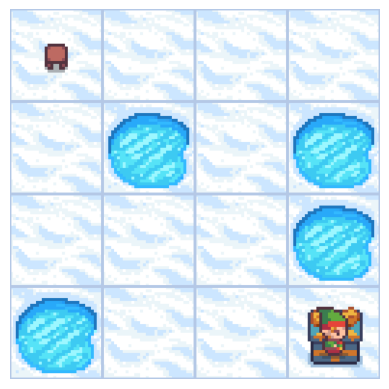

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, HTML
import time
import os
import imageio

# Initialize the FrozenLake environment with 'rgb_array' for visualization
video_folder = "video"
os.makedirs(video_folder, exist_ok=True)

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)

# Q-learning parameters
alpha = 0.1  # Learning rate (increased for faster learning)
gamma = 0.99  # Discount factor (importance of future rewards)
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.999  # Decay rate for exploration
epsilon_min = 0.01  # Minimum exploration rate
num_episodes = 5000  # Increased training episodes for better learning
num_iterations = 100  # Maximum steps per episode

# Initialize Q-table with zeros
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Function to render the environment and collect frames for video
def render_env(env, frames):
    frame = env.render()
    if isinstance(frame, list):
        frame = frame[0]
    elif len(frame.shape) == 4:
        frame = frame.squeeze(0)
    if frame.shape[-1] != 3:
        frame = frame[..., :3]
    frames.append(frame)
    plt.imshow(frame)
    plt.axis('off')
    display(plt.gcf())
    clear_output(wait=True)

# Function to reset environment (compatible with gym 0.25.2)
def reset_env(env):
    return env.reset()

# Q-learning training loop
for episode in range(num_episodes):
    state = reset_env(env)  # Get initial state (single value in gym 0.25.2)
    done = False
    total_reward = 0

    for _ in range(num_iterations):
        # Choose action: Exploration vs. Exploitation
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Random action (exploration)
        else:
            action = np.argmax(q_table[state, :])  # Best action (exploitation)

        # Take action and observe outcome
        new_state, reward, done, info = env.step(action)

        # Update Q-value using the Bellman Equation
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[new_state, :]) - q_table[state, action])

        # Move to the next state
        state = new_state
        total_reward += reward

        if done:
            break

    # Decay epsilon (reduce exploration over time)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Print progress every 500 episodes
    if episode % 500 == 0:
        print(f"Episode {episode}: Total Reward: {total_reward}")

env.close()

# Display the final Q-table
print("\nFinal Q-Table:\n", q_table)

# Play using the learned policy
def play_learned_policy():
    env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)
    state = reset_env(env)  # Get initial state
    frames = []

    render_env(env, frames)
    print('Playing with learned policy')

    for _ in range(num_iterations):
        action = np.argmax(q_table[state, :])  # Follow the best learned policy
        new_state, reward, done, info = env.step(action)

        render_env(env, frames)
        time.sleep(0.5)  # Pause for visibility

        state = new_state
        if done:
            if reward > 0:
                print("Reached Goal! 🎯")
            else:
                print("Fell into a Hole! 💀")
            break

    env.close()
    return frames

# Record the learned policy as a video
frames = play_learned_policy()
video_path = os.path.join(video_folder, "frozenlake_learned_policy.mp4")
imageio.mimsave(video_path, frames, fps=5)

# Display the video in Jupyter Notebook
def display_video(video_path):
    display(HTML(f"""
        <video width="600" controls>
            <source src="{video_path}" type="video/mp4">
        </video>
    """))

display_video(video_path)


In [ ]:
q_table

array([[9.41480149e-01, 9.50990050e-01, 9.32065327e-01, 9.41480149e-01],
       [9.41480147e-01, 0.00000000e+00, 6.02495455e-01, 7.55609875e-01],
       [1.89374837e-01, 8.12632106e-01, 3.07771326e-02, 2.21830635e-01],
       [1.43000826e-01, 0.00000000e+00, 7.25367025e-04, 1.41570818e-02],
       [9.50990050e-01, 9.60596010e-01, 0.00000000e+00, 9.41480148e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.54072094e-01, 0.00000000e+00, 2.70713845e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.60596000e-01, 0.00000000e+00, 9.70299000e-01, 9.50990049e-01],
       [9.60595846e-01, 9.80100000e-01, 9.80099822e-01, 0.00000000e+00],
       [9.09297250e-01, 9.90000000e-01, 0.00000000e+00, 6.92729834e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.80099875e-01, 9.90000000e

In [ ]:
headers = ["Left (0)", "Down (1)", "Right (2)", "Up (3)"]

print("\nQ-Table with Headers:")
print("\t" + "\t".join(headers))

# Iterate through each state and print its Q-values
for state, q_values in enumerate(q_table):
    print(f"State {state}:\t" + "\t".join(map(lambda x: f"{x:.4f}", q_values)))


Q-Table with Headers:
	Left (0)	Down (1)	Right (2)	Up (3)
State 0:	0.9415	0.9510	0.9321	0.9415
State 1:	0.9415	0.0000	0.6025	0.7556
State 2:	0.1894	0.8126	0.0308	0.2218
State 3:	0.1430	0.0000	0.0007	0.0142
State 4:	0.9510	0.9606	0.0000	0.9415
State 5:	0.0000	0.0000	0.0000	0.0000
State 6:	0.0000	0.9541	0.0000	0.2707
State 7:	0.0000	0.0000	0.0000	0.0000
State 8:	0.9606	0.0000	0.9703	0.9510
State 9:	0.9606	0.9801	0.9801	0.0000
State 10:	0.9093	0.9900	0.0000	0.6927
State 11:	0.0000	0.0000	0.0000	0.0000
State 12:	0.0000	0.0000	0.0000	0.0000
State 13:	0.0000	0.9801	0.9900	0.9703
State 14:	0.9801	0.9900	1.0000	0.9801
State 15:	0.0000	0.0000	0.0000	0.0000


In [ ]:
headers = ["Left (0)", "Down (1)", "Right (2)", "Up (3)"]

# Define ANSI color codes
RESET = "\033[0m"      # Reset to default color
HIGHLIGHT = "\033[92m" # Green for the max Q-value

print("\nQ-Table with Headers:")
print("\t" + "\t".join(headers))

# Iterate through each state and print its Q-values with the max highlighted
for state, q_values in enumerate(q_table):
    max_value = np.max(q_values)  # Find the max value in the row
    print(f"State {state}:\t", end="")

    # Print each Q-value, highlighting the max value
    for q in q_values:
        if q == max_value:
            print(f"{HIGHLIGHT}{q:.4f}{RESET}", end="\t")
        else:
            print(f"{q:.4f}", end="\t")
    print()  # Newline after each state



Q-Table with Headers:
	Left (0)	Down (1)	Right (2)	Up (3)
State 0:	0.9415	0.9510	0.9321	0.9415	
State 1:	0.9415	0.0000	0.6025	0.7556	
State 2:	0.1894	0.8126	0.0308	0.2218	
State 3:	0.1430	0.0000	0.0007	0.0142	
State 4:	0.9510	0.9606	0.0000	0.9415	
State 5:	0.0000	0.0000	0.0000	0.0000	
State 6:	0.0000	0.9541	0.0000	0.2707	
State 7:	0.0000	0.0000	0.0000	0.0000	
State 8:	0.9606	0.0000	0.9703	0.9510	
State 9:	0.9606	0.9801	0.9801	0.0000	
State 10:	0.9093	0.9900	0.0000	0.6927	
State 11:	0.0000	0.0000	0.0000	0.0000	
State 12:	0.0000	0.0000	0.0000	0.0000	
State 13:	0.0000	0.9801	0.9900	0.9703	
State 14:	0.9801	0.9900	1.0000	0.9801	
State 15:	0.0000	0.0000	0.0000	0.0000	


In [ ]:
headers = ["Left (0)", "Down (1)", "Right (2)", "Up (3)"]

# Define ANSI color codes
RESET = "\033[0m"      # Reset to default color
HIGHLIGHT = "\033[92m" # Green for max Q-value
PATH = "\033[93m"      # Yellow to highlight the path

print("\nQ-Table with Headers:")
print("\t" + "\t".join(headers))

# Function to follow the highest Q-value path from state 0
def get_highest_q_path(q_table, start_state=0):
    path = []
    current_state = start_state
    max_steps = len(q_table)  # Avoid infinite loops

    for _ in range(max_steps):
        path.append(current_state)

        # Find the action with the highest Q-value
        best_action = np.argmax(q_table[current_state])

        # Get the next state based on action
        next_state = get_next_state(current_state, best_action)

        if next_state == current_state or next_state in path:
            break  # Loop or terminal state detected

        current_state = next_state

    return path

# Function to determine the next state based on the action
def get_next_state(current_state, action):
    grid_size = int(np.sqrt(len(q_table)))
    row, col = divmod(current_state, grid_size)

    if action == 0:  # Left
        col = max(col - 1, 0)
    elif action == 1:  # Down
        row = min(row + 1, grid_size - 1)
    elif action == 2:  # Right
        col = min(col + 1, grid_size - 1)
    elif action == 3:  # Up
        row = max(row - 1, 0)

    return row * grid_size + col

# Get the path by following the highest Q-values from state 0
path = get_highest_q_path(q_table, start_state=0)
print(f"\nPath from State 0: {path}\n")

# Iterate through each state and print Q-values, highlighting the path and max
for state, q_values in enumerate(q_table):
    max_value = np.max(q_values)  # Find the max value in the row

    # Check if the current state is in the optimal path
    if state in path:
        print(f"{PATH}State {state}:{RESET}\t", end="")
    else:
        print(f"State {state}:\t", end="")

    # Print each Q-value, highlighting the max value
    for q in q_values:
        if q == max_value:
            print(f"{HIGHLIGHT}{q:.4f}{RESET}", end="\t")
        else:
            print(f"{q:.4f}", end="\t")
    print()  # Newline after each state



Q-Table with Headers:
	Left (0)	Down (1)	Right (2)	Up (3)

Path from State 0: [0, 4, 8, 9, 13, 14, 15]

State 0:	0.9415	0.9510	0.9321	0.9415	
State 1:	0.9415	0.0000	0.6025	0.7556	
State 2:	0.1894	0.8126	0.0308	0.2218	
State 3:	0.1430	0.0000	0.0007	0.0142	
State 4:	0.9510	0.9606	0.0000	0.9415	
State 5:	0.0000	0.0000	0.0000	0.0000	
State 6:	0.0000	0.9541	0.0000	0.2707	
State 7:	0.0000	0.0000	0.0000	0.0000	
State 8:	0.9606	0.0000	0.9703	0.9510	
State 9:	0.9606	0.9801	0.9801	0.0000	
State 10:	0.9093	0.9900	0.0000	0.6927	
State 11:	0.0000	0.0000	0.0000	0.0000	
State 12:	0.0000	0.0000	0.0000	0.0000	
State 13:	0.0000	0.9801	0.9900	0.9703	
State 14:	0.9801	0.9900	1.0000	0.9801	
State 15:	0.0000	0.0000	0.0000	0.0000	


In [ ]:
## Word Completion with fixed max Q Value

## 📋 Q-Learning Trainer Overview

---

### 📊 1. Goal
Train an agent using **Q-learning** to optimize a sentence completion task for the setence **i like ice ____** by selecting the best completion from three options: `"cream"`, `"hockey"`, or `"donkey"`, based on the associated reward values.

---

### ⚙️ 2. Core Components

1. **Environment Setup**:  
   - **Completions**: Possible outcomes (`"cream"`, `"hockey"`, `"donkey"`).  
   - **Rewards**: Positive and negative feedback:  
     - `"cream"`: +10  
     - `"hockey"`: +5  
     - `"donkey"`: -10  

2. **Q-Table**:  
   - Stores the **action-value estimates** for each action.  
   - Initialized as a zero matrix of shape `(1, len(completions))`.  

3. **Epsilon-Greedy Policy**:  
   - **Exploration**: With probability `epsilon`, the agent takes a random action.  
   - **Exploitation**: Otherwise, it selects the action with the highest Q-value.  

4. **Q-Value Update Rule**:  
   For each action, the Q-value is updated using the **Bellman equation**:  
   
   \[
   Q(s, a) \leftarrow Q(s, a) + \alpha (r + \gamma \max Q(s', a') - Q(s, a))
   \]

---

### 🔢 3. Hyperparameters

- **alpha**: Learning rate (`0.1`)  
- **gamma**: Discount factor (`0.99`)  
- **epsilon**: Exploration rate (`1.0` initially)  
- **epsilon_decay**: Decay rate for exploration (`0.995`)  
- **epsilon_min**: Minimum exploration rate (`0.01`)  
- **num_episodes**: Total training episodes (`5000`)  

---

### 🔍 4. Training Process

1. **Initialization**:  
   - Set up the environment and initialize the **Q-table** with zeros.  

2. **Action Selection**:  
   - Use the **epsilon-greedy** policy to choose an action.  

3. **Reward Collection**:  
   - Retrieve the reward based on the selected completion.  

4. **Q-Value Update**:  
   - Update the **Q-table** using the Bellman equation.  

5. **Exploration Decay**:  
   - Gradually reduce the exploration rate `epsilon` until it reaches `epsilon_min`.  

6. **Completion Condition**:  
   - Since there's only one state, the episode ends after each update.  

---

### 📈 5. Output and Visualization

1. **Final Q-Table**: Displays the learned Q-values for each completion.  
2. **Learned Policy**: Simulates a completion using the action with the highest Q-value.  
3. **Q-Table with Headers**: Displays the Q-values with corresponding completions.  

---

### 🎮 6. Evaluation

After training, the model:

- Prints the **final Q-table** representing action-value estimates.  
- Simulates the learned policy by selecting the action with the highest Q-value.  

---

✅ **Usage**:  
- Adjust hyperparameters to fine-tune training behavior.  
- Inspect the final Q-table to evaluate the agent's learned preferences.  
- Use `play_sentence_completion()` to test the model's output.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, HTML
import time
import os
import imageio

# Set up environment parameters
completions = ["cream", "hockey", "donkey"]
completion_rewards = {"cream": 10, "hockey": 5, "donkey": -10}

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995  # Decay rate for exploration
epsilon_min = 0.01  # Minimum exploration rate
num_episodes = 5000  # Training episodes

# Initialize Q-table
q_table = np.zeros((1, len(completions)))

def choose_action(state):
    #print("q_table[state]",q_table[state])
    if np.random.rand() < epsilon:
        return np.random.choice(len(completions))
    return np.argmax(q_table[state])

def get_reward(action):
    word = completions[action]
    return completion_rewards[word]

# Train the agent
epsilon = 1.0
for episode in range(num_episodes):
    state = 0  # Only one state: "I like ice ____"
    done = False

    while not done:
        action = choose_action(state)
        reward = get_reward(action)
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[state]) - q_table[state, action])
        done = True

    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Display the final Q-table
print("\nFinal Q-Table:")
print(q_table)

# Play with learned policy
def play_sentence_completion():
    print("\nPlaying with learned policy:")
    state = 0
    action = np.argmax(q_table[state])
    print(f"I like ice {completions[action]}")

play_sentence_completion()

# Visualize the Q-table with headers
headers = completions
print("\nQ-Table with Headers:")
print("\t" + "\t".join(headers))
print("\t" + "\t".join(map(str, q_table[0])))



Final Q-Table:
[[992.23772337 806.30430052 749.78706522]]

Playing with learned policy:
I like ice cream

Q-Table with Headers:
	cream	hockey	donkey
	992.2377233664495	806.3043005246587	749.7870652248578


In [ ]:
## Word Completion with random choice ####

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, HTML
import time
import os
import imageio

# Set up environment parameters
completions = ["cream", "hockey", "donkey"]
completion_rewards = {"cream": 10, "hockey": 5, "donkey": -10}

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995  # Decay rate for exploration
epsilon_min = 0.01  # Minimum exploration rate
num_episodes = 5000  # Training episodes

# Initialize Q-table
q_table = np.zeros((1, len(completions)))

def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(len(completions))
    return np.random.choice(np.flatnonzero(q_table[state] == q_table[state].max()))

def get_reward(action):
    word = completions[action]
    return completion_rewards[word]

# Train the agent
epsilon = 1.0
for episode in range(num_episodes):
    state = 0  # Only one state: "I like ice ____"
    done = False

    while not done:
        action = choose_action(state)
        reward = get_reward(action)
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[state]) - q_table[state, action])
        done = True

    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Display the final Q-table
print("\nFinal Q-Table:")
print(q_table)

# Play with learned policy 10 times
def play_sentence_completion():
    print("\nPlaying with learned policy:")
    state = 0
    for _ in range(10):
        action = np.random.choice(np.flatnonzero(q_table[state] == q_table[state].max()))
        print(f"I like ice {completions[action]}")

play_sentence_completion()

# Visualize the Q-table with headers
headers = completions
print("\nQ-Table with Headers:")
print("\t" + "\t".join(headers))
print("\t" + "\t".join(map(str, q_table[0])))



Final Q-Table:
[[992.25285291 830.47216591 615.00990002]]

Playing with learned policy:
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream

Q-Table with Headers:
	cream	hockey	donkey
	992.252852907991	830.4721659145204	615.0099000159205


In [ ]:
## Word Completion with a bit of Probability added to robust output ####

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, HTML
import time
import os
import imageio

# Set up environment parameters
completions = ["cream", "hockey", "donkey"]
completion_rewards = {"cream": 10, "hockey": 5, "donkey": -10}

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995  # Decay rate for exploration
epsilon_min = 0.01  # Minimum exploration rate
num_episodes = 5000  # Training episodes


# Initialize Q-table
q_table = np.zeros((1, len(completions)))

# Visualize the Q-table with headers
headers = completions
print("\nIntialize Q-Table with Headers:")
print("\t" + "\t".join(headers))
print("\t" + "\t".join(map(str, q_table[0])))


def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(len(completions))
    return np.random.choice(np.flatnonzero(q_table[state] == q_table[state].max()))



def get_reward(action):
    word = completions[action]
    return completion_rewards[word]

# Train the agent
epsilon = 1.0
for episode in range(num_episodes):
    state = 0  # Only one state: "I like ice ____"
    done = False

    while not done:
        action = choose_action(state)
        reward = get_reward(action)
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[state]) - q_table[state, action])
        done = True

    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Display the final Q-table
print("\nFinal Q-Table:")
print(q_table)

# Play with learned policy 10 times
# Play with learned policy 10 times
def play_sentence_completion():
    print("\nPlaying with learned policy:")
    state = 0
    # Apply softmax to convert Q-values into probabilities

    exp_q = np.exp(q_table[state] - np.max(q_table[state]))  # Subtract max for numerical stability
    probabilities = exp_q / np.sum(exp_q)

    print("Probabilities:", probabilities)


    temperature = 100  # Increase this to flatten the distribution
    exp_q = np.exp((q_table[state] - np.max(q_table[state])) / temperature)
    probabilities = exp_q / np.sum(exp_q)

    print("Smoothed Probabilities:", probabilities)


    print("q_table[state]",q_table[state])
    for _ in range(10):
        #action = np.random.choice(np.flatnonzero(q_table[state] == q_table[state].max()))
        # Choose an action based on the smoothed probabilities
        action = np.random.choice(len(completions), p=probabilities)
        print(f"I like ice {completions[action]}")

play_sentence_completion()

# Visualize the Q-table with headers
headers = completions
print("\nQ-Table with Headers:")
print("\t" + "\t".join(headers))
print("\t" + "\t".join(map(str, q_table[0])))



Intialize Q-Table with Headers:
	cream	hockey	donkey
	0.0	0.0	0.0

Final Q-Table:
[[992.12861832 769.66589068 783.05791698]]

Playing with learned policy:
Probabilities: [1.00000000e+00 2.43032835e-97 1.59128539e-91]
Smoothed Probabilities: [0.81188112 0.0877706  0.10034828]
q_table[state] [992.12861832 769.66589068 783.05791698]
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice hockey
I like ice cream

Q-Table with Headers:
	cream	hockey	donkey
	992.1286183247347	769.6658906773366	783.0579169752848


In [ ]:
# Deep Q learning #


## 📋 Deep Q-Learning (DQN) Trainer Overview

---

### 📊 1. Goal
Train a **Deep Q-Network (DQN)** to optimize a sentence completion task by selecting the best completion from three options: `"cream"`, `"hockey"`, or `"donkey"`, based on associated reward values.

---

### ⚙️ 2. Core Components

1. **Environment Setup**:  
   - **Completions**: Possible outcomes (`"cream"`, `"hockey"`, `"donkey"`).  
   - **Rewards**: Positive and negative feedback:  
     - `"cream"`: +10  
     - `"hockey"`: +5  
     - `"donkey"`: -10  

2. **Deep Q-Network (DQN)**:  
   - A neural network with three fully connected layers:  
     - Input: State representation (`1` in this case).  
     - Output: Q-values for each action.  
   - Uses **ReLU** activation for non-linearity.  

3. **Epsilon-Greedy Policy**:  
   - **Exploration**: With probability `epsilon`, take a random action.  
   - **Exploitation**: Otherwise, choose the action with the **highest Q-value**.  

4. **Q-Value Update Rule**:  
   For each action, the Q-value is updated using the **Bellman equation**:  

   \[
   Q(s, a) \leftarrow r + \gamma \max Q(s', a')
   \]

---

### 🔢 3. Hyperparameters

- **alpha**: Learning rate (`0.001`)  
- **gamma**: Discount factor (`0.99`)  
- **epsilon**: Initial exploration rate (`1.0`)  
- **epsilon_decay**: Exploration decay rate (`0.995`)  
- **epsilon_min**: Minimum exploration rate (`0.01`)  
- **num_episodes**: Number of training episodes (`8000`)  

---

### 🔍 4. Training Process

1. **Initialization**:  
   - Create a **DQN model** with a fully connected architecture.  
   - Initialize the **optimizer** (Adam) and **loss function** (MSELoss).  

2. **Action Selection**:  
   - Use the **epsilon-greedy** policy to choose an action.  

3. **Reward Collection**:  
   - Retrieve the reward for the chosen completion.  

4. **Q-Value Update**:  
   - Predict the current Q-values using the **DQN**.  
   - Compute the **target Q-value** using the Bellman equation.  
   - Minimize the **MSE loss** between predicted and target Q-values.  

5. **Exploration Decay**:  
   - Decrease the **epsilon** value over time for better exploitation.  

6. **Completion Condition**:  
   - Each episode ends after a single action due to the static state.  

---

### 📈 5. Output and Visualization

1. **Final Q-Values**: Displays the learned Q-values for each completion.  
2. **Learned Policy**: Simulates completions using the **trained model**:  
   - **Original Probabilities**: Based on softmax transformation of Q-values.  
   - **Altered Probabilities**: Applies a **temperature parameter** to control action randomness.  

---

### 🎮 6. Evaluation

After training, the model:

- Prints the **final Q-values** for each completion.  
- Simulates **10 completions** using the trained policy.  
- Demonstrates the effect of **temperature** on action probabilities.  

---

✅ **Usage**:  
- Adjust hyperparameters to fine-tune exploration and learning behavior.  
- Evaluate the model's decisions by inspecting the **final Q-values**.  
- Use `play_sentence_completion()` to simulate the learned policy.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Set up environment parameters
completions = ["cream", "hockey", "donkey"]
completion_rewards = {"cream": 10, "hockey": 5, "donkey": -10}

# Hyperparameters
alpha = 0.001  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995  # Decay rate for exploration
epsilon_min = 0.01  # Minimum exploration rate
num_episodes = 8000  # Training episodes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Neural Network for Deep Q-Learning
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize model and optimizer
model = DQN(1, len(completions)).to(device)
optimizer = optim.Adam(model.parameters(), lr=alpha)
loss_fn = nn.MSELoss()

def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(len(completions))

    input_tensor = torch.FloatTensor([state]).to(device)
    with torch.no_grad():
        q_values = model(input_tensor)

    return torch.argmax(q_values).item()

def get_reward(action):
    word = completions[action]
    return completion_rewards[word]

# Training the DQN
epsilon = 1.0
for episode in range(num_episodes):
    state = 0  # Fixed input "I like ice ____"
    done = False

    while not done:
        action = choose_action(state)
        reward = get_reward(action)

        # Prepare tensors
        input_tensor = torch.FloatTensor([state]).to(device)
        current_q_values = model(input_tensor)

        # Compute target Q-value
        target_q_values = current_q_values.clone().detach()
        target_q_values[action] = reward + gamma * torch.max(current_q_values).item()

        # Compute loss and backpropagate
        loss = loss_fn(current_q_values, target_q_values)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        done = True

    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Display the final Q-values
print("\nFinal Q-Values:")
input_tensor = torch.FloatTensor([0]).to(device)
final_q_values = model(input_tensor).detach().cpu().numpy()
print(final_q_values)

# Play with learned policy 10 times
def play_sentence_completion():
    print("\nPlaying with learned policy:")
    state = 0

    input_tensor = torch.FloatTensor([state]).to(device)
    q_values = model(input_tensor).detach().cpu().numpy()

    # Apply softmax to convert Q-values into probabilities
    exp_q = np.exp(q_values - np.max(q_values))
    probabilities = exp_q / np.sum(exp_q)

    print("Probabilities:", probabilities)

    # Apply temperature for smoothing
    temperature = 500
    exp_q_temp = np.exp((q_values - np.max(q_values)) / temperature)
    probabilities_smoothed = exp_q_temp / np.sum(exp_q_temp)

    print("Learned Probabilities:", probabilities)

    for _ in range(10):
        action = np.random.choice(len(completions), p=probabilities.flatten())
        print(f"I like ice {completions[action]}")

    print("Altered Probabilities:", probabilities_smoothed)

    for _ in range(10):
        action = np.random.choice(len(completions), p=probabilities_smoothed.flatten())
        print(f"I like ice {completions[action]}")

play_sentence_completion()



Final Q-Values:
[1000.00226  943.3921   862.4612 ]

Playing with learned policy:
Probabilities: [1.0000000e+00 2.5972649e-25 0.0000000e+00]
Learned Probabilities: [1.0000000e+00 2.5972649e-25 0.0000000e+00]
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
Learned Probabilities: [0.377008   0.33665073 0.28634125]
I like ice donkey
I like ice donkey
I like ice donkey
I like ice donkey
I like ice cream
I like ice cream
I like ice cream
I like ice donkey
I like ice donkey
I like ice hockey


In [ ]:
# Simple PPO

## 📋 Proximal Policy Optimization (PPO) Trainer Overview

---

### 📊 1. Goal
Train a **Proximal Policy Optimization (PPO)** model to optimize a sentence completion task by selecting the best completion from three options: `"cream"`, `"hockey"`, or `"donkey"`, based on associated reward values.

---

### ⚙️ 2. Core Components

1. **Environment Setup**:  
   - **Completions**: Possible outcomes (`"cream"`, `"hockey"`, `"donkey"`).  
   - **Rewards**: Positive and negative feedback:  
     - `"cream"`: +10  
     - `"hockey"`: +5  
     - `"donkey"`: -10  

2. **Policy Network**:  
   - A neural network with three fully connected layers:  
     - Input: State representation (`1` in this case).  
     - Output: Action probabilities for each completion.  
   - Uses **ReLU** activation for non-linearity.  

3. **PPO Loss Calculation**:  
   The PPO objective optimizes the policy while limiting large updates using a clipping mechanism:  

   \[
   L(\theta) = \min(r_t(\theta) A_t, \text{clip}(r_t(\theta), 1 - \epsilon, 1 + \epsilon) A_t)
   \]

   - **r_t**: Ratio of new to old action probabilities.  
   - **A_t**: Advantage or reward signal.  
   - **clip**: Restricts policy updates to a small range to ensure stability.  

4. **Action Selection**:  
   - Use the **softmax** output of the policy network to determine action probabilities.  
   - Sample an action using these probabilities.  

---

### 🔢 3. Hyperparameters

- **alpha**: Learning rate (`0.001`)  
- **gamma**: Discount factor (`0.99`)  
- **num_episodes**: Number of training episodes (`5000`)  
- **clip_epsilon**: PPO clipping parameter (`0.2`)  

---

### 🔍 4. Training Process

1. **Initialization**:  
   - Create a **Policy Network** with fully connected layers.  
   - Initialize the **Adam optimizer** for gradient updates.  

2. **Action Selection**:  
   - Use the **softmax** output to select actions probabilistically.  

3. **Reward Collection**:  
   - Retrieve the reward based on the selected completion.  

4. **PPO Loss Calculation**:  
   - Compute the **probability ratio** between new and old policy.  
   - Apply **clipping** to prevent large updates.  

5. **Model Update**:  
   - Backpropagate and update the policy using **gradient descent**.  

6. **Completion Condition**:  
   - Since the environment is static, each episode ends after one action.  

---

### 📈 5. Output and Visualization

1. **Final Policy Probabilities**: Displays the learned action probabilities for each completion.  
2. **Learned Policy Simulation**: Generates 10 completions using the learned policy:  
   - **Original Probabilities**: From softmax-transformed logits.  
   - **Altered Probabilities**: Adjusted using a **temperature** parameter for smoother action sampling.  

---

### 🎮 6. Evaluation

After training, the model:

- Prints the **final policy probabilities** for each completion.  
- Simulates **10 completions** using the trained policy.  
- Demonstrates the effect of **temperature scaling** on the policy output.  

---

✅ **Usage**:  
- Adjust hyperparameters to fine-tune exploration and learning behavior.  
- Evaluate model decisions by inspecting the **final policy probabilities**.  
- Use `play_sentence_completion()` to simulate the learned policy.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.special import softmax

# Set up environment parameters
completions = ["cream", "hockey", "donkey"]
completion_rewards = {"cream": 10, "hockey": 5, "donkey": -10}

# Hyperparameters
alpha = 0.001  # Learning rate
gamma = 0.99  # Discount factor
num_episodes = 5000  # Training episodes
clip_epsilon = 0.2  # PPO clip parameter

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Neural Network for PPO
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize model and optimizer
policy_model = PolicyNetwork(1, len(completions)).to(device)
optimizer = optim.Adam(policy_model.parameters(), lr=alpha)

def choose_action(state):

    print("state",state)

    input_tensor = torch.FloatTensor([state]).to(device)
    print("Input Tensor",input_tensor)
    with torch.no_grad():
        logits = policy_model(input_tensor)
        print("logits",logits)
        probabilities = torch.softmax(logits, dim=-1).cpu().numpy().flatten()
        print("probabilities",probabilities)



    action = np.random.choice(len(completions), p=probabilities)
    return action, probabilities

def get_reward(action):
    word = completions[action]
    return completion_rewards[word]

# PPO loss function
def compute_ppo_loss(old_probs, new_probs, rewards, clip_epsilon):
    ratio = new_probs / old_probs
    clipped_ratio = torch.clamp(ratio, 1 - clip_epsilon, 1 + clip_epsilon)
    loss = -torch.min(ratio * rewards, clipped_ratio * rewards).mean()
    return loss

# Training the PPO agent
for episode in range(num_episodes):
    state = 0  # Fixed input "I like ice ____"
    done = False

    while not done:
        action, old_probs = choose_action(state)
        reward = get_reward(action)

        # Prepare tensors
        input_tensor = torch.FloatTensor([state]).to(device)
        logits = policy_model(input_tensor)
        new_probs = torch.softmax(logits, dim=-1)[action]

        # Ensure correct indexing for old_probs
        old_probs_tensor = torch.FloatTensor([old_probs[action]]).to(device)
        reward_tensor = torch.FloatTensor([reward]).to(device)

        # Compute PPO loss
        loss = compute_ppo_loss(old_probs_tensor, new_probs, reward_tensor, clip_epsilon)

        # Optimize policy
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        done = True

# Display the final policy probabilities
print("\nFinal Policy Probabilities:")
input_tensor = torch.FloatTensor([0]).to(device)
final_logits = policy_model(input_tensor).detach().cpu().numpy()
final_probs = softmax(final_logits)
print(final_probs)

# Play with learned policy 10 times
def play_sentence_completion():
    print("\nPlaying with learned policy:")
    state = 0

    input_tensor = torch.FloatTensor([state]).to(device)
    logits = policy_model(input_tensor).detach().cpu().numpy()

    # Apply softmax using scipy for numerical stability
    probabilities = softmax(logits)

    print("Probabilities:", probabilities)

    # Apply temperature for smoothing
    temperature = 10
    probabilities_smoothed = softmax(logits / temperature)

    print("Altered Probabilities:", probabilities_smoothed)

    # if needed can alter probabilities_smoothed to see variations

    for _ in range(10):
        action = np.random.choice(len(completions), p=probabilities.flatten())
        print(f"I like ice {completions[action]}")

play_sentence_completion()


Streaming output truncated to the last 5000 lines.
Input Tensor tensor([0.], device='cuda:0')
logits tensor([ 8.6249, -5.5926, -7.2709], device='cuda:0')
probabilities [9.9999917e-01 6.6903016e-07 1.2489411e-07]
state 0
Input Tensor tensor([0.], device='cuda:0')
logits tensor([ 8.6253, -5.5929, -7.2713], device='cuda:0')
probabilities [9.9999917e-01 6.6850782e-07 1.2479578e-07]
state 0
Input Tensor tensor([0.], device='cuda:0')
logits tensor([ 8.6257, -5.5933, -7.2717], device='cuda:0')
probabilities [9.9999917e-01 6.6798970e-07 1.2469823e-07]
state 0
Input Tensor tensor([0.], device='cuda:0')
logits tensor([ 8.6261, -5.5937, -7.2721], device='cuda:0')
probabilities [9.9999917e-01 6.6747009e-07 1.2460028e-07]
state 0
Input Tensor tensor([0.], device='cuda:0')
logits tensor([ 8.6265, -5.5940, -7.2724], device='cuda:0')
probabilities [9.9999917e-01 6.6695083e-07 1.2450252e-07]
state 0
Input Tensor tensor([0.], device='cuda:0')
logits tensor([ 8.6269, -5.5944, -7.2728], device='cuda:0')
p

In [ ]:
## GRPO

In [ ]:
## GRPO

old_probs: tensor([0.2706, 0.2706, 0.3992, 0.3992, 0.2706, 0.3992, 0.2706, 0.3992, 0.2706,
        0.3303, 0.2706, 0.2706, 0.3992, 0.3992, 0.3303, 0.2706, 0.3992, 0.3992,
        0.3303, 0.2706, 0.3992, 0.2706, 0.3992, 0.3992, 0.3303, 0.2706, 0.3992,
        0.2706, 0.3992, 0.3992, 0.2706, 0.3992], device='cuda:0')
new_probs: tensor([0.2706, 0.2706, 0.3992, 0.3992, 0.2706, 0.3992, 0.2706, 0.3992, 0.2706,
        0.3303, 0.2706, 0.2706, 0.3992, 0.3992, 0.3303, 0.2706, 0.3992, 0.3992,
        0.3303, 0.2706, 0.3992, 0.2706, 0.3992, 0.3992, 0.3303, 0.2706, 0.3992,
        0.2706, 0.3992, 0.3992, 0.2706, 0.3992], device='cuda:0',
       grad_fn=<IndexBackward0>)
Ratio: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       device='cuda:0', grad_fn=<DivBackward0>)
Rewards: tensor([-1.0000, -1.0000,  1.0000,  1.0000, -1.0000,  1.0000, -1.0000,  1.0000,
        -1.0000,  0.5000, -1.0000, -1.0000, 

<ipython-input-27-d33e771cd730>:178: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


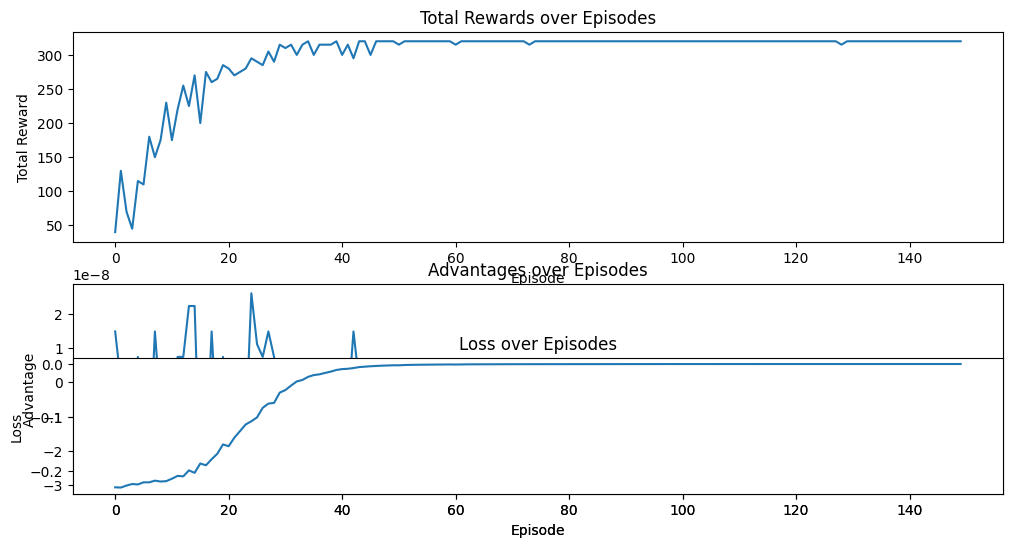


Playing with learned policy:
Probabilities: [9.9924064e-01 6.6610536e-04 9.3309442e-05]
Altered Probabilities: [0.5656894  0.24184494 0.19246574]
-------------------Learnned Probability----------------------
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
-------------------Altered Probability-----------------------
I like ice donkey
I like ice cream
I like ice hockey
I like ice donkey
I like ice donkey
I like ice cream
I like ice donkey
I like ice cream
I like ice donkey
I like ice cream


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.special import softmax

# Set up environment parameters
completions = ["cream", "hockey", "donkey"]
completion_rewards = {"cream": 10, "hockey": 5, "donkey": -10}

# Hyperparameters
alpha = 0.001  # Learning rate
gamma = 0.99  # Discount factor
num_episodes = 150  # Training episodes
clip_epsilon = 0.4  # GRPO clip parameter (increased for better updates)

# Dynamic temperature
initial_temperature = 10
temperature_decay = 0.999

# Gradient clipping value
gradient_clip = 0.5

# Batch size for policy updates
batch_size = 32

# Entropy regularization coefficient
entropy_coeff = 0.02

# Reward normalization factor
reward_scaling = 0.1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Neural Network for GRPO
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),  # Increased model capacity
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize model and optimizer
policy_model = PolicyNetwork(1, len(completions)).to(device)
optimizer = optim.Adam(policy_model.parameters(), lr=alpha)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)  # Learning rate scheduler

def choose_action(state):
    input_tensor = torch.FloatTensor([state]).to(device)
    with torch.no_grad():
        logits = policy_model(input_tensor)
        probabilities = torch.softmax(logits, dim=-1).cpu().numpy().flatten()
    action = np.random.choice(len(completions), p=probabilities)
    return action, probabilities

def get_reward(action):
    word = completions[action]
    return completion_rewards[word]

# GRPO loss function
def compute_grpo_loss(old_probs, new_probs, rewards, clip_epsilon):
    ratio = new_probs / old_probs
    advantage = (rewards - rewards.mean()) / (rewards.std() + 1e-8)
    clipped_ratio = torch.clamp(ratio, 1 - clip_epsilon, 1 + clip_epsilon)
    grpo_loss = -torch.min(ratio * advantage, clipped_ratio * advantage).mean()

    # Entropy regularization to encourage exploration
    entropy_loss = -(new_probs * torch.log(new_probs + 1e-8)).sum()

    # Print intermediate values for debugging

    print("old_probs:", old_probs)
    print("new_probs:", new_probs)
    print("Ratio:", ratio)
    print("Rewards:", rewards)
    print("rewards.mean()",rewards.mean())
    print("Advantage:", advantage)
    print("Clipped Ratio:", clipped_ratio)
    print("PPO Loss:", grpo_loss.item())
    print("Entropy Loss:", entropy_loss.item())
    print("Total Loss:", grpo_loss.item() + entropy_coeff * entropy_loss.item())

    total_loss = grpo_loss - entropy_coeff * entropy_loss


    return grpo_loss - entropy_coeff * entropy_loss

# Training the GRPO agent
temperature = initial_temperature
state = 0

total_rewards = []
advantages = []
losses = []

for episode in range(num_episodes):
    batch_actions = []
    batch_old_probs = []
    batch_rewards = []

    for _ in range(batch_size):
        action, old_probs = choose_action(state)
        reward = get_reward(action)

        batch_actions.append(action)
        batch_old_probs.append(old_probs[action])
        batch_rewards.append(reward)

    # Prepare tensors
    input_tensor = torch.FloatTensor([state]).to(device)
    logits = policy_model(input_tensor)
    new_probs = torch.softmax(logits, dim=-1)

    old_probs_tensor = torch.FloatTensor(batch_old_probs).to(device)
    reward_tensor = torch.FloatTensor(batch_rewards).to(device) * reward_scaling




    # Compute GRPO loss
    loss = compute_grpo_loss(old_probs_tensor, new_probs[batch_actions], reward_tensor, clip_epsilon)




    # Optimize policy
    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(policy_model.parameters(), gradient_clip)  # Gradient clipping
    optimizer.step()

    # Update learning rate and temperature
    scheduler.step()
    temperature *= temperature_decay

    # Store reward and advantage for visualization
    total_rewards.append(sum(batch_rewards))
    advantages.append(((reward_tensor - reward_tensor.mean()) / (reward_tensor.std() + 1e-8)).mean().item())
    losses.append(loss.item())

# Display the final policy probabilities
print("\nFinal Policy Probabilities:")
input_tensor = torch.FloatTensor([0]).to(device)
final_logits = policy_model(input_tensor).detach().cpu().numpy()
final_probs = softmax(final_logits)
print(final_probs)

# Plot training visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(total_rewards)
plt.title("Total Rewards over Episodes")
plt.xlabel("Episode")
plt.ylabel("Total Reward")

plt.subplot(2, 1, 2)
plt.plot(advantages)
plt.title("Advantages over Episodes")
plt.xlabel("Episode")
plt.ylabel("Advantage")


plt.subplot(3, 1, 3)
plt.plot(losses)
plt.title("Loss over Episodes")
plt.xlabel("Episode")
plt.ylabel("Loss")


plt.tight_layout()
plt.show()

def play_sentence_completion():
    print("\nPlaying with learned policy:")
    state = 0

    input_tensor = torch.FloatTensor([state]).to(device)
    logits = policy_model(input_tensor).detach().cpu().numpy()

    probabilities = softmax(logits)

    print("Probabilities:", probabilities)

    probabilities_smoothed = softmax(logits / temperature)

    print("Altered Probabilities:", probabilities_smoothed)

    print("-------------------Learnned Probability----------------------")


    for _ in range(10):
        action = np.random.choice(len(completions), p=probabilities.flatten())
        print(f"I like ice {completions[action]}")

    print("-------------------Altered Probability-----------------------")

    for _ in range(10):
        action = np.random.choice(len(completions), p=probabilities_smoothed.flatten())
        print(f"I like ice {completions[action]}")

play_sentence_completion()


In [ ]:
#GRPO 2

Final Policy Probabilities: [9.9987972e-01 1.0139318e-04 1.8796283e-05]


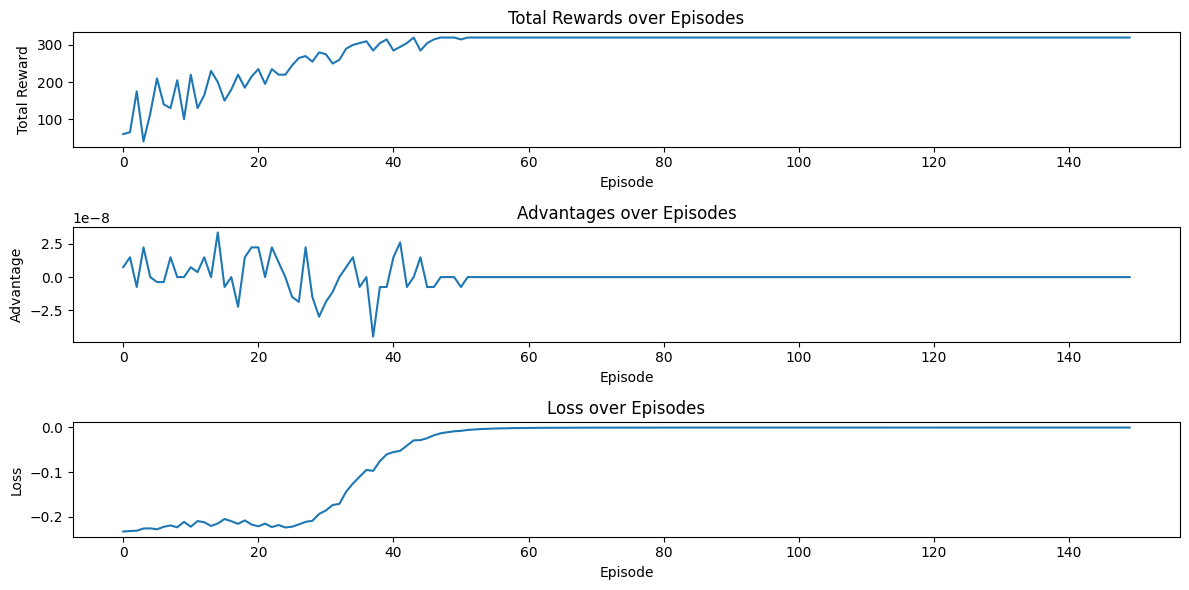


Playing with learned policy:
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.special import softmax

# Set up environment parameters
completions = ["cream", "hockey", "donkey"]
completion_rewards = {"cream": 10, "hockey": 5, "donkey": -10}

# Hyperparameters
alpha = 0.001  # Learning rate
gamma = 0.99  # Discount factor
num_episodes = 150  # Training episodes
clip_epsilon = 0.4  # GRPO clip parameter

# Dynamic temperature
initial_temperature = 10
temperature_decay = 0.999

# Gradient clipping value
gradient_clip = 0.5

# Batch size for policy updates
batch_size = 32

# Entropy regularization coefficient
entropy_coeff = 0.02

# KL divergence weight
kl_beta = 0.1

# Reward normalization factor
reward_scaling = 0.1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Neural Network for GRPO
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize models
policy_model = PolicyNetwork(1, len(completions)).to(device)
reference_model = PolicyNetwork(1, len(completions)).to(device)
reference_model.load_state_dict(policy_model.state_dict())
reference_model.eval()  # Freeze reference model

# Optimizer and scheduler
optimizer = optim.Adam(policy_model.parameters(), lr=alpha)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

def choose_action(state, model):
    input_tensor = torch.FloatTensor([state]).to(device)
    with torch.no_grad():
        logits = model(input_tensor)
        probabilities = torch.softmax(logits, dim=-1).cpu().numpy().flatten()
    action = np.random.choice(len(completions), p=probabilities)
    return action, probabilities

def get_reward(action):
    word = completions[action]
    return completion_rewards[word]

def compute_kl_divergence(new_probs, old_probs):
    return (old_probs * (torch.log(old_probs + 1e-8) - torch.log(new_probs + 1e-8))).sum()

def compute_grpo_loss(old_probs, new_probs, rewards, clip_epsilon, beta):
    ratio = new_probs / old_probs

    # Normalize advantages (reward scaling)
    advantage = (rewards - rewards.mean()) / (rewards.std() + 1e-8)

    # Clipped surrogate loss
    clipped_ratio = torch.clamp(ratio, 1 - clip_epsilon, 1 + clip_epsilon)
    grpo_loss = -torch.min(ratio * advantage, clipped_ratio * advantage).mean()

    # KL divergence penalty
    kl_div = compute_kl_divergence(new_probs, old_probs)

    # Entropy regularization
    entropy_loss = -(new_probs * torch.log(new_probs + 1e-8)).sum()

    total_loss = grpo_loss + beta * kl_div - entropy_coeff * entropy_loss

    return total_loss

# Training loop
temperature = initial_temperature
state = 0

total_rewards = []
advantages = []
losses = []

for episode in range(num_episodes):
    batch_actions = []
    batch_old_probs = []
    batch_rewards = []

    for _ in range(batch_size):
        # Choose actions from the policy model
        action, old_probs = choose_action(state, policy_model)
        reward = get_reward(action)

        batch_actions.append(action)
        batch_old_probs.append(old_probs[action])
        batch_rewards.append(reward)

    # Prepare tensors
    input_tensor = torch.FloatTensor([state]).to(device)

    # New policy probabilities (from the policy model)
    logits = policy_model(input_tensor)
    new_probs = torch.softmax(logits, dim=-1)

    # Old probabilities (from the reference model)
    with torch.no_grad():
        ref_logits = reference_model(input_tensor)
        ref_probs = torch.softmax(ref_logits, dim=-1)

    old_probs_tensor = torch.FloatTensor(batch_old_probs).to(device)
    reward_tensor = torch.FloatTensor(batch_rewards).to(device) * reward_scaling

    # Compute GRPO loss
    loss = compute_grpo_loss(old_probs_tensor, new_probs[batch_actions], reward_tensor, clip_epsilon, kl_beta)

    # Optimize the policy
    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(policy_model.parameters(), gradient_clip)
    optimizer.step()

    # Update learning rate and temperature
    scheduler.step()
    temperature *= temperature_decay

    # Store metrics
    total_rewards.append(sum(batch_rewards))
    advantages.append(((reward_tensor - reward_tensor.mean()) / (reward_tensor.std() + 1e-8)).mean().item())
    losses.append(loss.item())

# Display the learned policy
input_tensor = torch.FloatTensor([0]).to(device)
final_logits = policy_model(input_tensor).detach().cpu().numpy()
final_probs = softmax(final_logits)
print("Final Policy Probabilities:", final_probs)

# Plot training results
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(total_rewards)
plt.title("Total Rewards over Episodes")
plt.xlabel("Episode")
plt.ylabel("Total Reward")

plt.subplot(3, 1, 2)
plt.plot(advantages)
plt.title("Advantages over Episodes")
plt.xlabel("Episode")
plt.ylabel("Advantage")

plt.subplot(3, 1, 3)
plt.plot(losses)
plt.title("Loss over Episodes")
plt.xlabel("Episode")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

def play_sentence_completion():
    print("\nPlaying with learned policy:")
    state = 0
    input_tensor = torch.FloatTensor([state]).to(device)
    logits = policy_model(input_tensor).detach().cpu().numpy()
    probabilities = softmax(logits)

    for _ in range(10):
        action = np.random.choice(len(completions), p=probabilities.flatten())
        print(f"I like ice {completions[action]}")


play_sentence_completion()


In [ ]:
#GRPO 3 - Graphs

Completions: ['cream', 'hockey', 'donkey']
Probabilities: tensor([0.3096, 0.3548, 0.3356], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Rewards: tensor([ 0.5000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,  1.0000,  0.5000,
         0.5000, -1.0000,  1.0000, -1.0000,  0.5000, -1.0000, -1.0000,  0.5000,
         1.0000,  1.0000,  1.0000,  1.0000, -1.0000,  0.5000,  1.0000, -1.0000,
         1.0000,  0.5000,  0.5000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
       device='cuda:0')
Mean of rewards: -0.125
Advantage: tensor([ 0.6891, -0.9648, -0.9648, -0.9648, -0.9648, -0.9648,  1.2404,  0.6891,
         0.6891, -0.9648,  1.2404, -0.9648,  0.6891, -0.9648, -0.9648,  0.6891,
         1.2404,  1.2404,  1.2404,  1.2404, -0.9648,  0.6891,  1.2404, -0.9648,
         1.2404,  0.6891,  0.6891, -0.9648, -0.9648, -0.9648, -0.9648, -0.9648],
       device='cuda:0')
Completions: ['cream', 'hockey', 'donkey']
Probabilities: tensor([0.3256, 0.3650, 0.3093], device='cuda:0', grad_fn=<SoftmaxBackwa

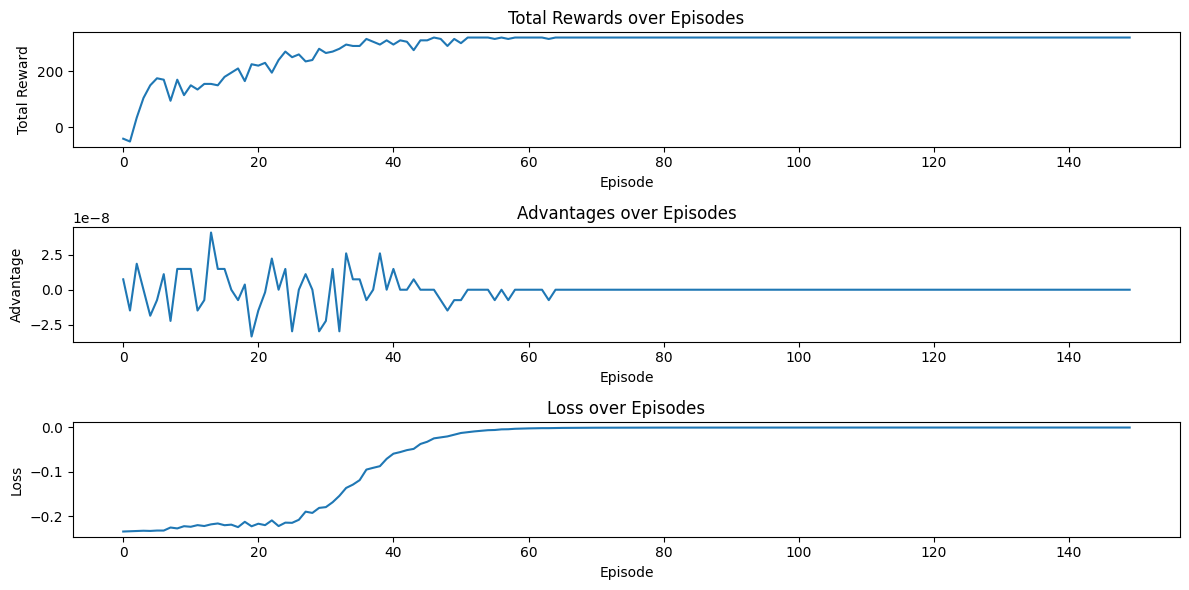


Playing with learned policy:
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.special import softmax

# Set up environment parameters
completions = ["cream", "hockey", "donkey"]
completion_rewards = {"cream": 10, "hockey": 5, "donkey": -10}

# Hyperparameters
alpha = 0.001  # Learning rate
gamma = 0.99  # Discount factor
num_episodes = 150  # Number of training iterations
clip_epsilon = 0.4  # Clipping range for PPO-like optimization

# Dynamic temperature
initial_temperature = 10
temperature_decay = 0.999

# Gradient clipping value
gradient_clip = 0.5

# Batch size for policy updates
batch_size = 32

# Entropy regularization coefficient
entropy_coeff = 0.02  # Weight for entropy bonus

# KL divergence weight
kl_beta = 0.1

# Reward normalization factor
reward_scaling = 0.1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Neural Network for GRPO
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize models
policy_model = PolicyNetwork(1, len(completions)).to(device)
reference_model = PolicyNetwork(1, len(completions)).to(device)
reference_model.load_state_dict(policy_model.state_dict())
reference_model.eval()  # Freeze reference model

# Optimizer and scheduler
optimizer = optim.Adam(policy_model.parameters(), lr=alpha)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

def choose_action(state, model):
    input_tensor = torch.FloatTensor([state]).to(device)
    with torch.no_grad():
        logits = model(input_tensor)
        probabilities = torch.softmax(logits, dim=-1).cpu().numpy().flatten()
    action = np.random.choice(len(completions), p=probabilities)
    return action, probabilities

def get_reward(action):
    word = completions[action]
    return completion_rewards[word]

def compute_kl_divergence(new_probs, old_probs):
    return (old_probs * (torch.log(old_probs + 1e-8) - torch.log(new_probs + 1e-8))).sum()

def compute_grpo_loss(old_probs, new_probs, rewards, clip_epsilon, beta):
    ratio = new_probs / old_probs

    # Normalize advantages (reward scaling)
    advantage = (rewards - rewards.mean()) / (rewards.std() + 1e-8)

    # Print rewards, mean, and advantage
    print("Rewards:", rewards)
    print("Mean of rewards:", rewards.mean().item())
    print("Advantage:", advantage)

    # Clipped surrogate loss
    clipped_ratio = torch.clamp(ratio, 1 - clip_epsilon, 1 + clip_epsilon)
    grpo_loss = -torch.min(ratio * advantage, clipped_ratio * advantage).mean()

    # KL divergence penalty
    kl_div = compute_kl_divergence(new_probs, old_probs)

    # Entropy regularization
    entropy_loss = -(new_probs * torch.log(new_probs + 1e-8)).sum()

    total_loss = grpo_loss + beta * kl_div - entropy_coeff * entropy_loss

    return total_loss

# Training loop
temperature = initial_temperature
state = 0

total_rewards = []
advantages = []
losses = []

for episode in range(num_episodes):
    batch_actions = []
    batch_old_probs = []
    batch_rewards = []

    for _ in range(batch_size):
        # Choose actions from the policy model
        action, old_probs = choose_action(state, policy_model)
        reward = get_reward(action)

        batch_actions.append(action)
        batch_old_probs.append(old_probs[action])
        batch_rewards.append(reward)

    # Prepare tensors
    input_tensor = torch.FloatTensor([state]).to(device)

    # New policy probabilities (from the policy model)
    logits = policy_model(input_tensor)
    new_probs = torch.softmax(logits, dim=-1)

    # Print completions and probabilities
    print("Completions:", completions)
    print("Probabilities:", new_probs)

    # Old probabilities (from the reference model)
    with torch.no_grad():
        ref_logits = reference_model(input_tensor)
        ref_probs = torch.softmax(ref_logits, dim=-1)

    old_probs_tensor = torch.FloatTensor(batch_old_probs).to(device)
    reward_tensor = torch.FloatTensor(batch_rewards).to(device) * reward_scaling

    # Compute GRPO loss
    loss = compute_grpo_loss(old_probs_tensor, new_probs[batch_actions], reward_tensor, clip_epsilon, kl_beta)

    # Optimize the policy
    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(policy_model.parameters(), gradient_clip)
    optimizer.step()

    # Update learning rate and temperature
    scheduler.step()
    temperature *= temperature_decay

    # Store metrics
    total_rewards.append(sum(batch_rewards))
    advantages.append(((reward_tensor - reward_tensor.mean()) / (reward_tensor.std() + 1e-8)).mean().item())
    losses.append(loss.item())

# Display the learned policy
input_tensor = torch.FloatTensor([0]).to(device)
final_logits = policy_model(input_tensor).detach().cpu().numpy()
final_probs = softmax(final_logits)
print("Final Policy Probabilities:", final_probs)

# Plot training results
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(total_rewards)
plt.title("Total Rewards over Episodes")
plt.xlabel("Episode")
plt.ylabel("Total Reward")

plt.subplot(3, 1, 2)
plt.plot(advantages)
plt.title("Advantages over Episodes")
plt.xlabel("Episode")
plt.ylabel("Advantage")

plt.subplot(3, 1, 3)
plt.plot(losses)
plt.title("Loss over Episodes")
plt.xlabel("Episode")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

def play_sentence_completion():
    print("\nPlaying with learned policy:")
    state = 0
    input_tensor = torch.FloatTensor([state]).to(device)
    logits = policy_model(input_tensor).detach().cpu().numpy()
    probabilities = softmax(logits)

    for _ in range(10):
        action = np.random.choice(len(completions), p=probabilities.flatten())
        print(f"I like ice {completions[action]}")

play_sentence_completion()


In [ ]:
#GRPO 4 - with KL Divergence Plotted

## 📋 GRPO Trainer Overview

---

### 📊 1. Goal
Train a **Group Relative Policy Optimization (GRPO)** model to optimize a sentence completion task by selecting one of three completions: `"cream"`, `"hockey"`, or `"donkey"` based on reward feedback.

---

### ⚙️ 2. Core Components

1. **Policy & Reference Models**:  
   - **Policy Model**: Learns to select completions by maximizing rewards.  
   - **Reference Model**: A frozen copy used to calculate **KL divergence**, preventing the policy from drifting too far.  

2. **GRPO Loss Calculation**:  
   The model minimizes a combination of three terms:  
   - **Clipped Policy Loss**: Ensures stable updates using PPO-style clipping.  
   - **KL Divergence**: Measures the difference between policy and reference models.  
   - **Entropy Regularization**: Encourages exploration by promoting policy randomness.  

3. **Metrics Tracking**:  
   The code tracks and plots the following metrics during training:  
   - Total Rewards  
   - Advantages  
   - Loss  
   - KL Divergence  
   - Probability Ratio  

---

### 🔢 3. Hyperparameters

- **alpha**: Learning rate (`0.001`)  
- **clip_epsilon**: PPO clipping parameter (`0.4`)  
- **kl_beta**: KL divergence weight (`0.1`)  
- **entropy_coeff**: Entropy regularization (`0.02`)  
- **batch_size**: Number of samples per update (`32`)  
- **num_episodes**: Number of training episodes (`150`)  
- **reward_scaling**: Scales rewards for stability (`0.1`)  

---

### 🔍 4. Training Process

1. **Action Selection**:  
   - Use the **policy model** to select an action based on softmax probabilities.  

2. **Reward Collection**:  
   - Obtain a reward based on the chosen completion.  

3. **Loss Calculation**:  
   - Compute the **GRPO loss**, combining policy loss, KL divergence, and entropy regularization.  

4. **Model Update**:  
   - Perform a gradient update using backpropagation.  

5. **Reference Model Sync**:  
   - Keep the **reference model** frozen for KL divergence calculation.  

6. **Logging and Visualization**:  
   - Record and plot the key metrics to monitor the model's performance.  

---

### 📈 5. Output and Visualization

The code generates five plots during training:

1. **Total Rewards**: Measures cumulative reward per episode.  
2. **Advantages**: Shows how much better actions are relative to the mean.  
3. **Loss**: Tracks policy optimization over episodes.  
4. **KL Divergence**: Monitors policy deviation from the reference model.  
5. **Probability Ratio**: Indicates how much the new policy differs from the old one.  

---

### 🎮 6. Evaluation

After training, the model:

- Outputs the final learned probabilities for each completion.  
- Simulates **10 completions** using the `play_sentence_completion()` function.  

---

✅ **Usage**:  
- Fine-tune the model by adjusting hyperparameters.  
- Observe KL divergence and probability ratio plots to monitor training stability.  
- Use `play_sentence_completion()` to evaluate the trained model.



Completions: ['cream', 'hockey', 'donkey']
Probabilities: tensor([0.3044, 0.4053, 0.2903], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Episode 1/150
Trained Policy Probabilities: [0.30437392 0.40531576 0.29031035]
Reference Probabilities: [0.30437392 0.40531576 0.29031035]
Rewards: tensor([ 1.0000,  0.5000,  0.5000,  1.0000,  0.5000, -1.0000,  1.0000,  1.0000,
         0.5000,  0.5000,  0.5000, -1.0000,  0.5000,  1.0000,  1.0000,  1.0000,
         1.0000, -1.0000,  0.5000,  1.0000,  0.5000, -1.0000,  0.5000, -1.0000,
        -1.0000,  1.0000,  1.0000, -1.0000,  1.0000, -1.0000, -1.0000, -1.0000],
       device='cuda:0')
Mean of rewards: 0.21875
Advantage: tensor([ 0.9076,  0.3267,  0.3267,  0.9076,  0.3267, -1.4159,  0.9076,  0.9076,
         0.3267,  0.3267,  0.3267, -1.4159,  0.3267,  0.9076,  0.9076,  0.9076,
         0.9076, -1.4159,  0.3267,  0.9076,  0.3267, -1.4159,  0.3267, -1.4159,
        -1.4159,  0.9076,  0.9076, -1.4159,  0.9076, -1.4159, -1.4159, -1.4159],
       device=

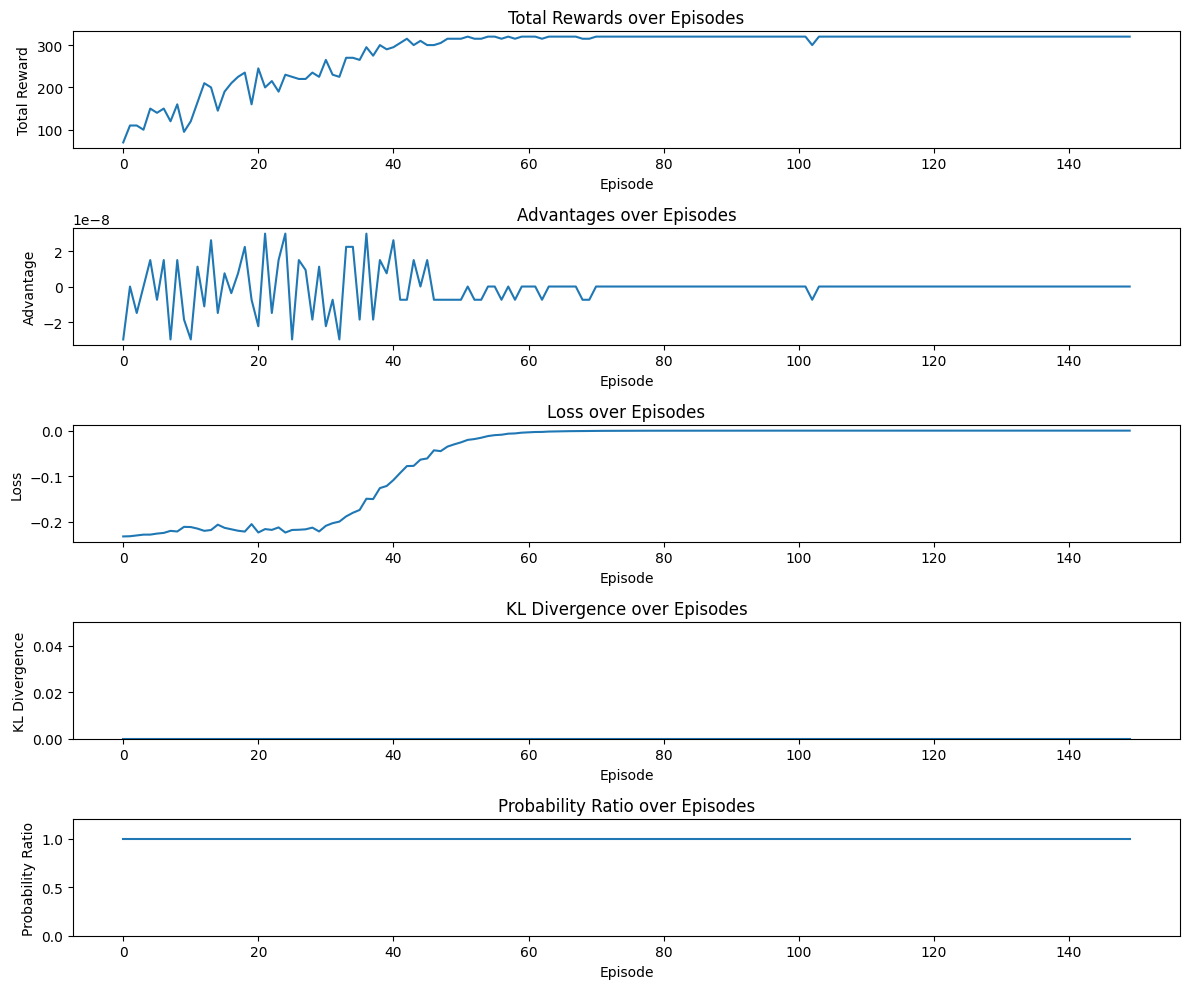


Playing with learned policy:
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.special import softmax

# Set up environment parameters
completions = ["cream", "hockey", "donkey"]
completion_rewards = {"cream": 10, "hockey": 5, "donkey": -10}

# Hyperparameters
alpha = 0.001  # Learning rate
gamma = 0.99  # Discount factor
num_episodes = 150  # Number of training iterations
clip_epsilon = 0.4  # Clipping range for PPO-like optimization

# Dynamic temperature
initial_temperature = 10
temperature_decay = 0.999

# Gradient clipping value
gradient_clip = 0.5

# Batch size for policy updates
batch_size = 32

# Entropy regularization coefficient
entropy_coeff = 0.02  # Weight for entropy bonus

# KL divergence weight
kl_beta = 0.1

# Reward normalization factor
reward_scaling = 0.1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Neural Network for GRPO
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize models
policy_model = PolicyNetwork(1, len(completions)).to(device)
reference_model = PolicyNetwork(1, len(completions)).to(device)
reference_model.load_state_dict(policy_model.state_dict())
reference_model.eval()  # Freeze reference model

# Optimizer and scheduler
optimizer = optim.Adam(policy_model.parameters(), lr=alpha)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

def choose_action(state, model):
    input_tensor = torch.FloatTensor([state]).to(device)
    with torch.no_grad():
        logits = model(input_tensor)
        probabilities = torch.softmax(logits, dim=-1).cpu().numpy().flatten()
    action = np.random.choice(len(completions), p=probabilities)
    return action, probabilities

def get_reward(action):
    word = completions[action]
    return completion_rewards[word]

def compute_kl_divergence(new_probs, old_probs):
    return (old_probs * (torch.log(old_probs + 1e-8) - torch.log(new_probs + 1e-8))).sum()

def compute_grpo_loss(old_probs, new_probs, rewards, clip_epsilon, beta):
    ratio = new_probs / old_probs

    # Normalize advantages (reward scaling)
    advantage = (rewards - rewards.mean()) / (rewards.std() + 1e-8)

    # Print rewards, mean, advantage, and ratio
    print("Rewards:", rewards)
    print("Mean of rewards:", rewards.mean().item())
    print("Advantage:", advantage)
    print("Probability Ratio:", ratio)

    # Clipped surrogate loss
    clipped_ratio = torch.clamp(ratio, 1 - clip_epsilon, 1 + clip_epsilon)
    grpo_loss = -torch.min(ratio * advantage, clipped_ratio * advantage).mean()

    # KL divergence penalty
    kl_div = compute_kl_divergence(new_probs, old_probs)

    # Entropy regularization
    entropy_loss = -(new_probs * torch.log(new_probs + 1e-8)).sum()

    total_loss = grpo_loss + beta * kl_div - entropy_coeff * entropy_loss

    return total_loss, kl_div, ratio

# Training loop
temperature = initial_temperature
state = 0

total_rewards = []
advantages = []
losses = []
kl_divergences = []
probability_ratios = []

for episode in range(num_episodes):
    batch_actions = []
    batch_old_probs = []
    batch_rewards = []

    for _ in range(batch_size):
        # Choose actions from the policy model
        action, old_probs = choose_action(state, policy_model)
        reward = get_reward(action)

        batch_actions.append(action)
        batch_old_probs.append(old_probs[action])
        batch_rewards.append(reward)

    # Prepare tensors
    input_tensor = torch.FloatTensor([state]).to(device)

    # New policy probabilities (from the policy model)
    logits = policy_model(input_tensor)
    new_probs = torch.softmax(logits, dim=-1)

    # Print completions and probabilities
    print("Completions:", completions)
    print("Probabilities:", new_probs)

    # Old probabilities (from the reference model)
    with torch.no_grad():
        ref_logits = reference_model(input_tensor)
        ref_probs = torch.softmax(ref_logits, dim=-1)

    # Print probabilities
    print(f"Episode {episode + 1}/{num_episodes}")
    #print("Trained Policy Probabilities:", new_probs.cpu().numpy().flatten())
    print("Trained Policy Probabilities:", new_probs.detach().cpu().numpy().flatten())
    print("Reference Probabilities:", ref_probs.cpu().numpy().flatten())

    old_probs_tensor = torch.FloatTensor(batch_old_probs).to(device)
    reward_tensor = torch.FloatTensor(batch_rewards).to(device) * reward_scaling

    # Compute GRPO loss, KL divergence, and probability ratio
    loss, kl_div, ratio = compute_grpo_loss(old_probs_tensor, new_probs[batch_actions], reward_tensor, clip_epsilon, kl_beta)


    # Optimize the policy
    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(policy_model.parameters(), gradient_clip)
    optimizer.step()

    # Update learning rate and temperature
    scheduler.step()
    temperature *= temperature_decay

    # Store metrics
    total_rewards.append(sum(batch_rewards))
    advantages.append(((reward_tensor - reward_tensor.mean()) / (reward_tensor.std() + 1e-8)).mean().item())
    losses.append(loss.item())
    kl_divergences.append(kl_div.item())
    probability_ratios.append(ratio.mean().item())

# Display the learned policy
input_tensor = torch.FloatTensor([0]).to(device)
final_logits = policy_model(input_tensor).detach().cpu().numpy()
final_probs = softmax(final_logits)
print("Final Policy Probabilities:", final_probs)

 # Final probabilities
input_tensor = torch.FloatTensor([0]).to(device)
final_logits = policy_model(input_tensor).detach().cpu().numpy()
final_probs = softmax(final_logits)
print("Final Trained Policy Probabilities:", final_probs)

ref_logits = reference_model(input_tensor).detach().cpu().numpy()
ref_probs = softmax(ref_logits)
print("Final Reference Probabilities:", ref_probs)

# Plot training results
plt.figure(figsize=(12, 10))
plt.subplot(5, 1, 1)
plt.plot(total_rewards)
plt.title("Total Rewards over Episodes")
plt.xlabel("Episode")
plt.ylabel("Total Reward")

plt.subplot(5, 1, 2)
plt.plot(advantages)
plt.title("Advantages over Episodes")
plt.xlabel("Episode")
plt.ylabel("Advantage")

plt.subplot(5, 1, 3)
plt.plot(losses)
plt.title("Loss over Episodes")
plt.xlabel("Episode")
plt.ylabel("Loss")

plt.subplot(5, 1, 4)
plt.plot(kl_divergences)
plt.title("KL Divergence over Episodes")
plt.xlabel("Episode")
plt.ylabel("KL Divergence")
plt.ylim(0, max(0.05, max(kl_divergences) * 1.2))  # Ensure y-axis shows increments of 0.01



plt.subplot(5, 1, 5)
plt.plot(probability_ratios)
plt.title("Probability Ratio over Episodes")
plt.xlabel("Episode")
plt.ylabel("Probability Ratio")
plt.ylim(0, max(0.05, max(probability_ratios) * 1.2))  # Ensure y-axis shows increments of 0.01



plt.tight_layout()
plt.show()

def play_sentence_completion():
    print("\nPlaying with learned policy:")
    state = 0
    input_tensor = torch.FloatTensor([state]).to(device)
    logits = policy_model(input_tensor).detach().cpu().numpy()
    probabilities = softmax(logits)

    for _ in range(10):
        action = np.random.choice(len(completions), p=probabilities.flatten())
        print(f"I like ice {completions[action]}")

play_sentence_completion()


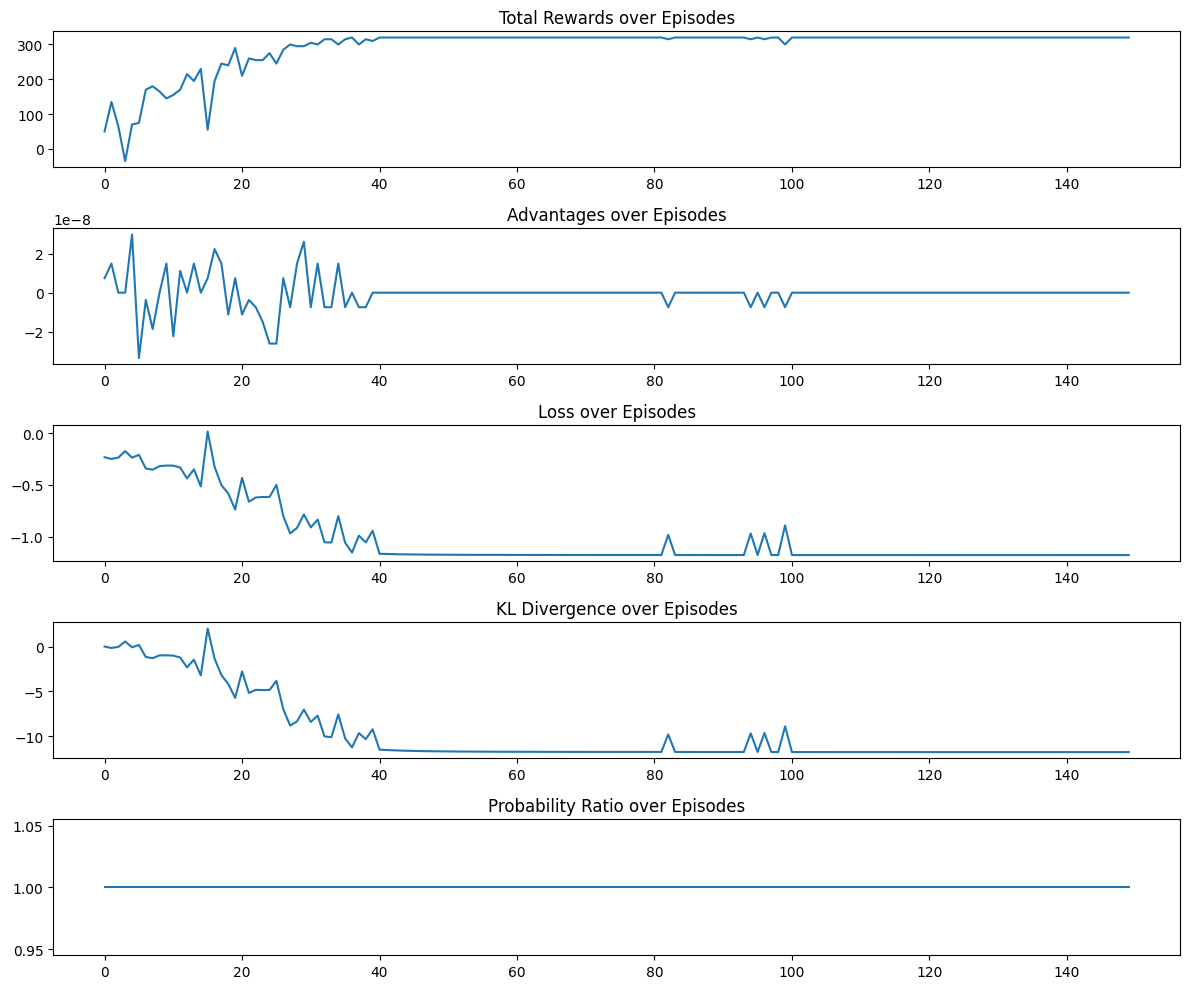


Playing with learned policy:
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.special import softmax

# Set up environment parameters
completions = ["cream", "hockey", "donkey"]
completion_rewards = {"cream": 10, "hockey": 5, "donkey": -10}

# Hyperparameters
alpha = 0.001  # Learning rate
gamma = 0.99  # Discount factor
num_episodes = 150  # Number of training iterations
clip_epsilon = 0.4  # Clipping range for PPO-like optimization

# Dynamic temperature
initial_temperature = 10
temperature_decay = 0.999

# Gradient clipping value
gradient_clip = 0.5

# Batch size for policy updates
batch_size = 32

# Entropy regularization coefficient
entropy_coeff = 0.02  # Weight for entropy bonus

# KL divergence weight
kl_beta = 0.1

# Reward normalization factor
reward_scaling = 0.1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Neural Network for GRPO
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize models
policy_model = PolicyNetwork(1, len(completions)).to(device)
reference_model = PolicyNetwork(1, len(completions)).to(device)
reference_model.load_state_dict(policy_model.state_dict())
reference_model.eval()  # Freeze reference model

# Optimizer and scheduler
optimizer = optim.Adam(policy_model.parameters(), lr=alpha)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

def choose_action(state, model):
    input_tensor = torch.FloatTensor([state]).to(device)
    with torch.no_grad():
        logits = model(input_tensor)
        probabilities = torch.softmax(logits, dim=-1).cpu().numpy().flatten()
    action = np.random.choice(len(completions), p=probabilities)
    return action, probabilities

def get_reward(action):
    word = completions[action]
    return completion_rewards[word]

def compute_kl_divergence(new_probs, ref_probs):
    return (ref_probs * (torch.log(ref_probs + 1e-8) - torch.log(new_probs + 1e-8))).sum()

def compute_grpo_loss(old_probs, new_probs, ref_probs, rewards, clip_epsilon, beta):
    ratio = new_probs / old_probs

    # Normalize advantages (reward scaling)
    advantage = (rewards - rewards.mean()) / (rewards.std() + 1e-8)

    # Clipped surrogate loss
    clipped_ratio = torch.clamp(ratio, 1 - clip_epsilon, 1 + clip_epsilon)
    grpo_loss = -torch.min(ratio * advantage, clipped_ratio * advantage).mean()

    # KL divergence penalty
    kl_div = compute_kl_divergence(new_probs, ref_probs)

    # Entropy regularization
    entropy_loss = -(new_probs * torch.log(new_probs + 1e-8)).sum()

    total_loss = grpo_loss + beta * kl_div - entropy_coeff * entropy_loss

    return total_loss, kl_div, ratio

# Training loop
temperature = initial_temperature
state = 0

total_rewards = []
advantages = []
losses = []
kl_divergences = []
probability_ratios = []

for episode in range(num_episodes):
    batch_actions = []
    batch_old_probs = []
    batch_rewards = []

    for _ in range(batch_size):
        action, old_probs = choose_action(state, policy_model)
        reward = get_reward(action)

        batch_actions.append(action)
        batch_old_probs.append(old_probs[action])
        batch_rewards.append(reward)

    # Prepare tensors
    input_tensor = torch.FloatTensor([state]).to(device)

    # New policy probabilities
    logits = policy_model(input_tensor)
    new_probs = torch.softmax(logits, dim=-1)

    with torch.no_grad():
        ref_logits = reference_model(input_tensor)
        ref_probs = torch.softmax(ref_logits, dim=-1)

    old_probs_tensor = torch.FloatTensor(batch_old_probs).to(device)
    reward_tensor = torch.FloatTensor(batch_rewards).to(device) * reward_scaling

    loss, kl_div, ratio = compute_grpo_loss(old_probs_tensor, new_probs[batch_actions], ref_probs[batch_actions], reward_tensor, clip_epsilon, kl_beta)

    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(policy_model.parameters(), gradient_clip)
    optimizer.step()

    scheduler.step()
    temperature *= temperature_decay

    total_rewards.append(sum(batch_rewards))
    advantages.append(((reward_tensor - reward_tensor.mean()) / (reward_tensor.std() + 1e-8)).mean().item())
    losses.append(loss.item())
    kl_divergences.append(kl_div.item())
    probability_ratios.append(ratio.mean().item())

# Display results
plt.figure(figsize=(12, 10))
plt.subplot(5, 1, 1)
plt.plot(total_rewards)
plt.title("Total Rewards over Episodes")
plt.subplot(5, 1, 2)
plt.plot(advantages)
plt.title("Advantages over Episodes")
plt.subplot(5, 1, 3)
plt.plot(losses)
plt.title("Loss over Episodes")
plt.subplot(5, 1, 4)
plt.plot(kl_divergences)
plt.title("KL Divergence over Episodes")
plt.subplot(5, 1, 5)
plt.plot(probability_ratios)
plt.title("Probability Ratio over Episodes")
plt.tight_layout()
plt.show()

def play_sentence_completion():
    print("\nPlaying with learned policy:")
    state = 0
    input_tensor = torch.FloatTensor([state]).to(device)
    logits = policy_model(input_tensor).detach().cpu().numpy()
    probabilities = softmax(logits)

    for _ in range(10):
        action = np.random.choice(len(completions), p=probabilities.flatten())
        print(f"I like ice {completions[action]}")

play_sentence_completion()


In [ ]:
## ref probs

Episode 0 - New Probs: [0.3421701  0.31731412 0.34051582], Ref Probs: [0.3421701  0.31731412 0.34051582]
rewards tensor([ 1.0000, -1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.5000,  0.5000,
         1.0000,  1.0000,  0.5000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         0.5000,  0.5000,  1.0000,  1.0000, -1.0000,  0.5000, -1.0000,  1.0000,
        -1.0000,  0.5000,  1.0000,  1.0000,  0.5000,  1.0000, -1.0000,  0.5000],
       device='cuda:0')
rewards.mean() tensor(0.2344, device='cuda:0')
rewards.std() tensor(0.8705, device='cuda:0')
Episode 1 - New Probs: [0.36318922 0.31566945 0.3211414 ], Ref Probs: [0.3421701  0.31731412 0.34051582]
rewards tensor([-1.0000, -1.0000, -1.0000,  0.5000,  0.5000,  1.0000,  0.5000, -1.0000,
        -1.0000,  1.0000,  1.0000,  0.5000,  1.0000,  1.0000,  0.5000,  1.0000,
         0.5000,  1.0000,  0.5000,  1.0000,  0.5000,  1.0000,  0.5000,  1.0000,
        -1.0000,  0.5000, -1.0000,  1.0000,  1.0000,  0.5000,  1.0000,  0.5000],
       device='

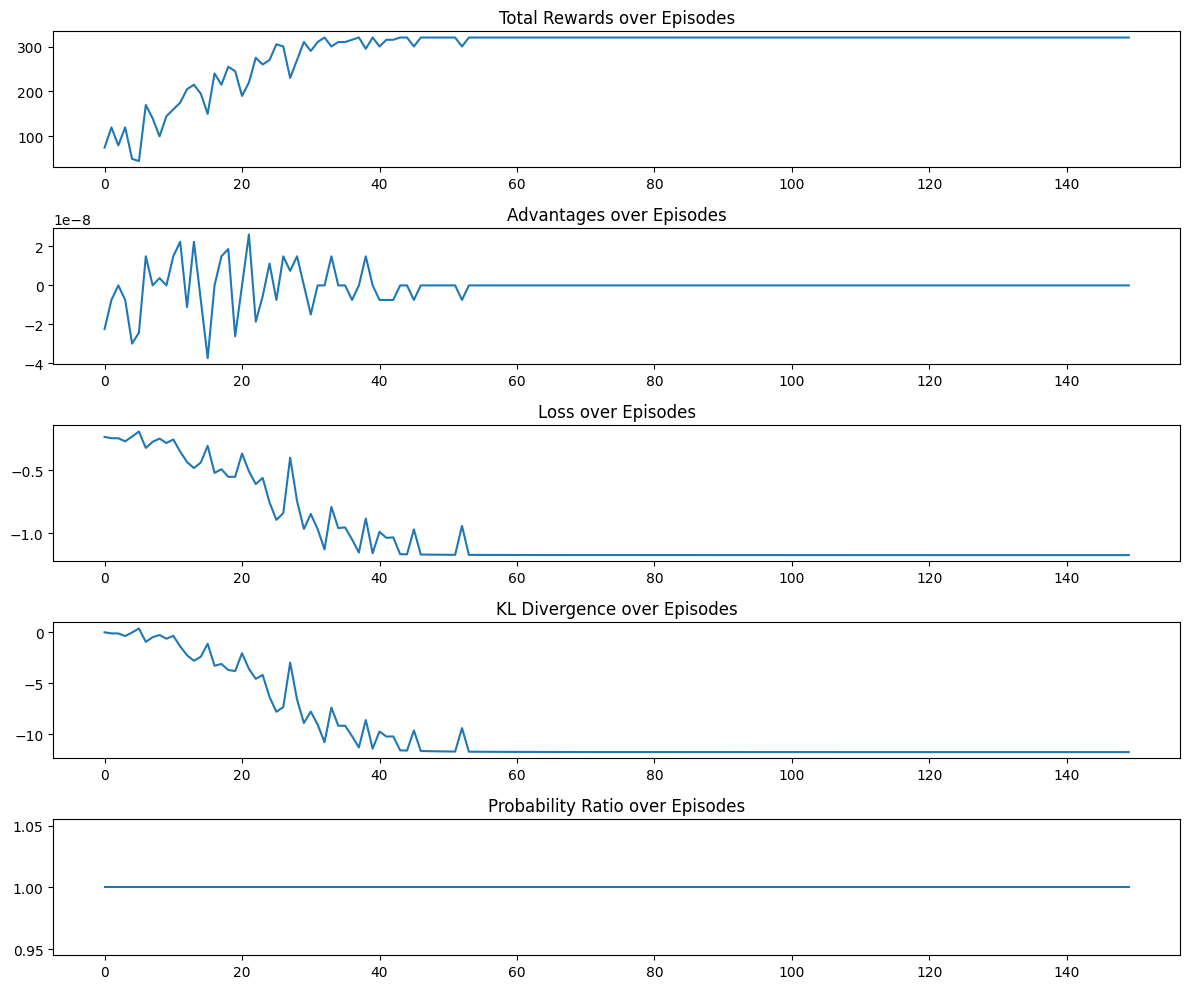


Playing with learned policy:
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.special import softmax

# Set up environment parameters
completions = ["cream", "hockey", "donkey"]
completion_rewards = {"cream": 10, "hockey": 5, "donkey": -10}

# Hyperparameters
alpha = 0.001  # Learning rate
gamma = 0.99  # Discount factor
num_episodes = 150  # Number of training iterations
clip_epsilon = 0.4  # Clipping range for PPO-like optimization

# Dynamic temperature
initial_temperature = 10
temperature_decay = 0.999

# Gradient clipping value
gradient_clip = 0.5

# Batch size for policy updates
batch_size = 32

# Entropy regularization coefficient
entropy_coeff = 0.02  # Weight for entropy bonus

# KL divergence weight
kl_beta = 0.1

# Reward normalization factor
reward_scaling = 0.1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Neural Network for GRPO
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize models
policy_model = PolicyNetwork(1, len(completions)).to(device)
reference_model = PolicyNetwork(1, len(completions)).to(device)
reference_model.load_state_dict(policy_model.state_dict())
reference_model.eval()  # Freeze reference model

# Optimizer and scheduler
optimizer = optim.Adam(policy_model.parameters(), lr=alpha)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

def choose_action(state, model):
    input_tensor = torch.FloatTensor([state]).to(device)
    with torch.no_grad():
        logits = model(input_tensor)
        probabilities = torch.softmax(logits, dim=-1).cpu().numpy().flatten()
    action = np.random.choice(len(completions), p=probabilities)
    return action, probabilities

def get_reward(action):
    word = completions[action]
    return completion_rewards[word]

def compute_kl_divergence(new_probs, ref_probs):
    return (ref_probs * (torch.log(ref_probs + 1e-8) - torch.log(new_probs + 1e-8))).sum()

def compute_grpo_loss(old_probs, new_probs, ref_probs, rewards, clip_epsilon, beta):
    ratio = new_probs / old_probs

    # Normalize advantages (reward scaling)
    print("rewards",rewards)
    print("rewards.mean()",rewards.mean())
    print("rewards.std()",rewards.std())
    advantage = (rewards - rewards.mean()) / (rewards.std() + 1e-8)

    # Clipped surrogate loss
    clipped_ratio = torch.clamp(ratio, 1 - clip_epsilon, 1 + clip_epsilon)
    grpo_loss = -torch.min(ratio * advantage, clipped_ratio * advantage).mean()

    # KL divergence penalty
    kl_div = compute_kl_divergence(new_probs, ref_probs)

    # Entropy regularization
    entropy_loss = -(new_probs * torch.log(new_probs + 1e-8)).sum()

    total_loss = grpo_loss + beta * kl_div - entropy_coeff * entropy_loss

    return total_loss, kl_div, ratio

# Training loop
temperature = initial_temperature
state = 0

total_rewards = []
advantages = []
losses = []
kl_divergences = []
probability_ratios = []

for episode in range(num_episodes):
    batch_actions = []
    batch_old_probs = []
    batch_rewards = []

    for _ in range(batch_size):
        action, old_probs = choose_action(state, policy_model)
        reward = get_reward(action)

        batch_actions.append(action)
        batch_old_probs.append(old_probs[action])
        batch_rewards.append(reward)

    # Prepare tensors
    input_tensor = torch.FloatTensor([state]).to(device)

    # New policy probabilities
    logits = policy_model(input_tensor)
    new_probs = torch.softmax(logits, dim=-1)

    with torch.no_grad():
        ref_logits = reference_model(input_tensor)
        ref_probs = torch.softmax(ref_logits, dim=-1)

    print(f"Episode {episode} - New Probs: {new_probs.detach().cpu().numpy()}, Ref Probs: {ref_probs.detach().cpu().numpy()}")


    old_probs_tensor = torch.FloatTensor(batch_old_probs).to(device)
    reward_tensor = torch.FloatTensor(batch_rewards).to(device) * reward_scaling

    loss, kl_div, ratio = compute_grpo_loss(old_probs_tensor, new_probs[batch_actions], ref_probs[batch_actions], reward_tensor, clip_epsilon, kl_beta)

    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(policy_model.parameters(), gradient_clip)
    optimizer.step()

    scheduler.step()
    temperature *= temperature_decay

    total_rewards.append(sum(batch_rewards))
    advantages.append(((reward_tensor - reward_tensor.mean()) / (reward_tensor.std() + 1e-8)).mean().item())
    losses.append(loss.item())
    kl_divergences.append(kl_div.item())
    probability_ratios.append(ratio.mean().item())




# Display results
plt.figure(figsize=(12, 10))
plt.subplot(5, 1, 1)
plt.plot(total_rewards)
plt.title("Total Rewards over Episodes")
plt.subplot(5, 1, 2)
plt.plot(advantages)
plt.title("Advantages over Episodes")
plt.subplot(5, 1, 3)
plt.plot(losses)
plt.title("Loss over Episodes")
plt.subplot(5, 1, 4)
plt.plot(kl_divergences)
plt.title("KL Divergence over Episodes")
plt.subplot(5, 1, 5)
plt.plot(probability_ratios)
plt.title("Probability Ratio over Episodes")
plt.tight_layout()
plt.show()

def play_sentence_completion():
    print("\nPlaying with learned policy:")
    state = 0
    input_tensor = torch.FloatTensor([state]).to(device)
    logits = policy_model(input_tensor).detach().cpu().numpy()
    probabilities = softmax(logits)

    for _ in range(10):
        action = np.random.choice(len(completions), p=probabilities.flatten())
        print(f"I like ice {completions[action]}")

play_sentence_completion()


In [ ]:
# Classical GRPO with N completions

Generated 5 completions: [array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32), array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32), array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32), array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32), array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32)]
Generated 5 completions: [array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32), array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32), array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32), array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32), array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32)]
Generated 5 completions: [array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32), array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32), array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32), array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32), array([0.34055772, 0.31908822, 0.3403541 ], dtype=float32)]
Generated 5 completion

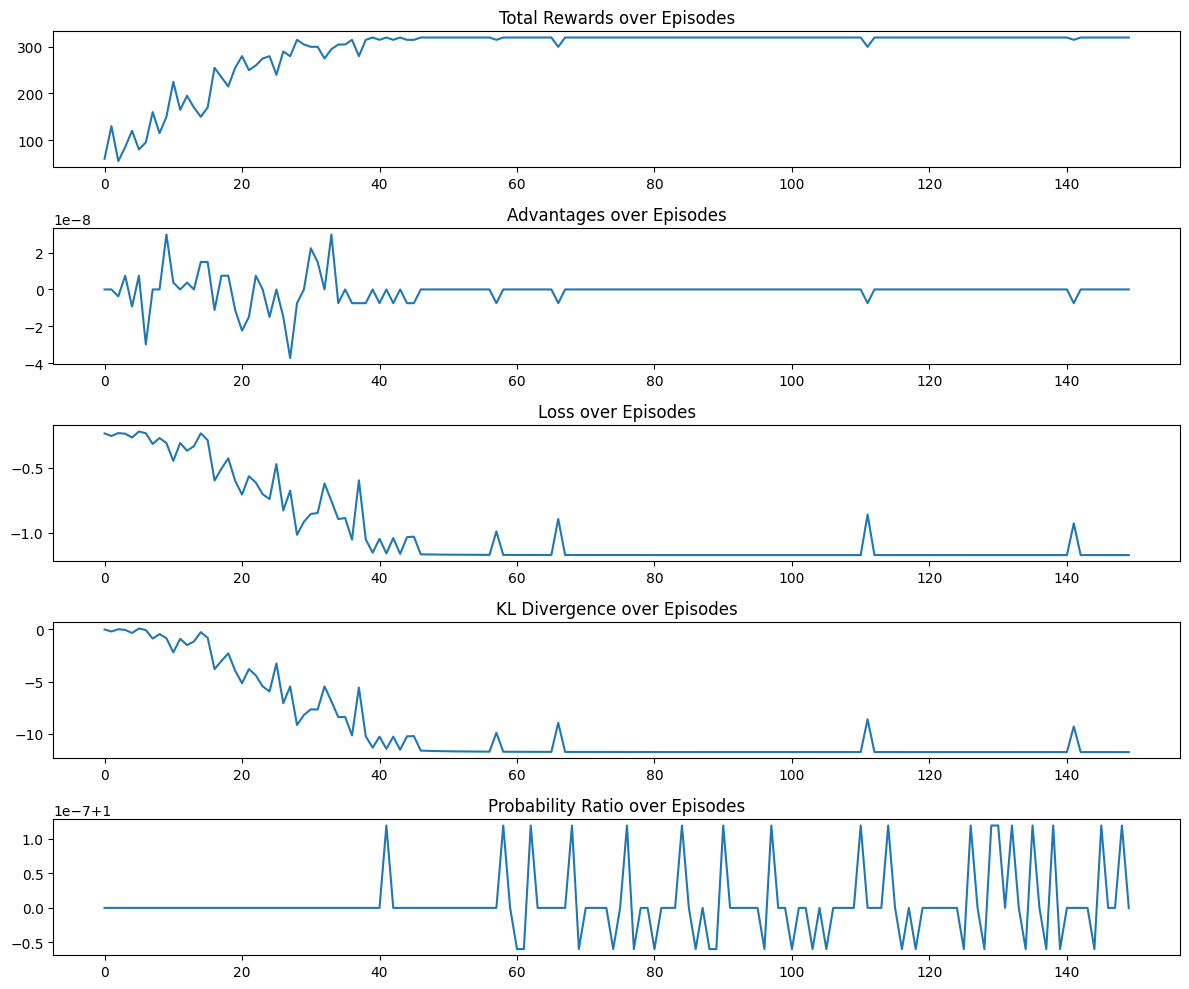


Playing with learned policy:
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream


In [ ]:
#Updated Classical GRPO Implementation: Averaging Model Responses

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.special import softmax

# Set up environment parameters
completions = ["cream", "hockey", "donkey"]
completion_rewards = {"cream": 10, "hockey": 5, "donkey": -10}

# Hyperparameters
alpha = 0.001  # Learning rate
gamma = 0.99  # Discount factor
num_episodes = 150  # Number of training iterations
clip_epsilon = 0.4  # Clipping range for PPO-like optimization

# Dynamic temperature
initial_temperature = 10
temperature_decay = 0.999

# Gradient clipping value
gradient_clip = 0.5

# Batch size for policy updates
batch_size = 32

# Number of responses to average (for classical GRPO)
avg_responses = 5

# Entropy regularization coefficient
entropy_coeff = 0.02  # Weight for entropy bonus

# KL divergence weight
kl_beta = 0.1

# Reward normalization factor
reward_scaling = 0.1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Neural Network for GRPO
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize models
policy_model = PolicyNetwork(1, len(completions)).to(device)
reference_model = PolicyNetwork(1, len(completions)).to(device)
reference_model.load_state_dict(policy_model.state_dict())
reference_model.eval()  # Freeze reference model

# Optimizer and scheduler
optimizer = optim.Adam(policy_model.parameters(), lr=alpha)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

def choose_action_with_averaging(state, model, n=avg_responses):
    input_tensor = torch.FloatTensor([state]).to(device)
    all_probs = []

    with torch.no_grad():
        for _ in range(n):
            logits = model(input_tensor)
            probabilities = torch.softmax(logits, dim=-1).cpu().numpy().flatten()
            all_probs.append(probabilities)

    avg_probs = np.mean(all_probs, axis=0)

    # Print individual completions
    print(f"Generated {n} completions: {all_probs}")

    action = np.random.choice(len(completions), p=avg_probs)
    return action, avg_probs

def get_reward(action):
    word = completions[action]
    return completion_rewards[word]

def compute_kl_divergence(new_probs, ref_probs):
    return (ref_probs * (torch.log(ref_probs + 1e-8) - torch.log(new_probs + 1e-8))).sum()

def compute_grpo_loss(old_probs, new_probs, ref_probs, rewards, clip_epsilon, beta):
    ratio = new_probs / old_probs

    # Normalize advantages (reward scaling)
    advantage = (rewards - rewards.mean()) / (rewards.std() + 1e-8)

    # Clipped surrogate loss
    clipped_ratio = torch.clamp(ratio, 1 - clip_epsilon, 1 + clip_epsilon)
    grpo_loss = -torch.min(ratio * advantage, clipped_ratio * advantage).mean()

    # KL divergence penalty
    kl_div = compute_kl_divergence(new_probs, ref_probs)

    # Entropy regularization
    entropy_loss = -(new_probs * torch.log(new_probs + 1e-8)).sum()

    total_loss = grpo_loss + beta * kl_div - entropy_coeff * entropy_loss

    return total_loss, kl_div, ratio

# Training loop
temperature = initial_temperature
state = 0

total_rewards = []
advantages = []
losses = []
kl_divergences = []
probability_ratios = []

for episode in range(num_episodes):
    batch_actions = []
    batch_old_probs = []
    batch_rewards = []

    for _ in range(batch_size):
        action, old_probs = choose_action_with_averaging(state, policy_model)
        reward = get_reward(action)

        batch_actions.append(action)
        batch_old_probs.append(old_probs[action])
        batch_rewards.append(reward)

    # Prepare tensors
    input_tensor = torch.FloatTensor([state]).to(device)

    # New policy probabilities
    logits = policy_model(input_tensor)
    new_probs = torch.softmax(logits, dim=-1)

    with torch.no_grad():
        ref_logits = reference_model(input_tensor)
        ref_probs = torch.softmax(ref_logits, dim=-1)

    print(f"Episode {episode} - New Probs: {new_probs.cpu().detach().numpy()}, Ref Probs: {ref_probs.cpu().detach().numpy()}")

    old_probs_tensor = torch.FloatTensor(batch_old_probs).to(device)
    reward_tensor = torch.FloatTensor(batch_rewards).to(device) * reward_scaling

    loss, kl_div, ratio = compute_grpo_loss(old_probs_tensor, new_probs[batch_actions], ref_probs[batch_actions], reward_tensor, clip_epsilon, kl_beta)

    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(policy_model.parameters(), gradient_clip)
    optimizer.step()

    scheduler.step()
    temperature *= temperature_decay

    total_rewards.append(sum(batch_rewards))
    advantages.append(((reward_tensor - reward_tensor.mean()) / (reward_tensor.std() + 1e-8)).mean().item())
    losses.append(loss.item())
    kl_divergences.append(kl_div.item())
    probability_ratios.append(ratio.mean().item())

# Display results
plt.figure(figsize=(12, 10))
plt.subplot(5, 1, 1)
plt.plot(total_rewards)
plt.title("Total Rewards over Episodes")
plt.subplot(5, 1, 2)
plt.plot(advantages)
plt.title("Advantages over Episodes")
plt.subplot(5, 1, 3)
plt.plot(losses)
plt.title("Loss over Episodes")
plt.subplot(5, 1, 4)
plt.plot(kl_divergences)
plt.title("KL Divergence over Episodes")
plt.subplot(5, 1, 5)
plt.plot(probability_ratios)
plt.title("Probability Ratio over Episodes")
plt.tight_layout()
plt.show()

def play_sentence_completion():
    print("\nPlaying with learned policy:")
    state = 0
    input_tensor = torch.FloatTensor([state]).to(device)
    logits = policy_model(input_tensor).detach().cpu().numpy()
    probabilities = softmax(logits)

    for _ in range(10):
        action = np.random.choice(len(completions), p=probabilities.flatten())
        print(f"I like ice {completions[action]}")

play_sentence_completion()


In [ ]:
# GRPO with Individial Rewards

Streaming output truncated to the last 5000 lines.
Generated completion 4: cream, Probabilities: [9.9999154e-01 8.3903469e-06 7.0884482e-08]

Generated completion 5: cream, Probabilities: [9.9999154e-01 8.3903469e-06 7.0884482e-08]

Generated completion 1: cream, Probabilities: [9.9999154e-01 8.3903469e-06 7.0884482e-08]

Generated completion 2: cream, Probabilities: [9.9999154e-01 8.3903469e-06 7.0884482e-08]

Generated completion 3: cream, Probabilities: [9.9999154e-01 8.3903469e-06 7.0884482e-08]

Generated completion 4: cream, Probabilities: [9.9999154e-01 8.3903469e-06 7.0884482e-08]

Generated completion 5: cream, Probabilities: [9.9999154e-01 8.3903469e-06 7.0884482e-08]

Generated completion 1: cream, Probabilities: [9.9999154e-01 8.3903469e-06 7.0884482e-08]

Generated completion 2: cream, Probabilities: [9.9999154e-01 8.3903469e-06 7.0884482e-08]

Generated completion 3: cream, Probabilities: [9.9999154e-01 8.3903469e-06 7.0884482e-08]

Generated completion 4: cream, Probabil

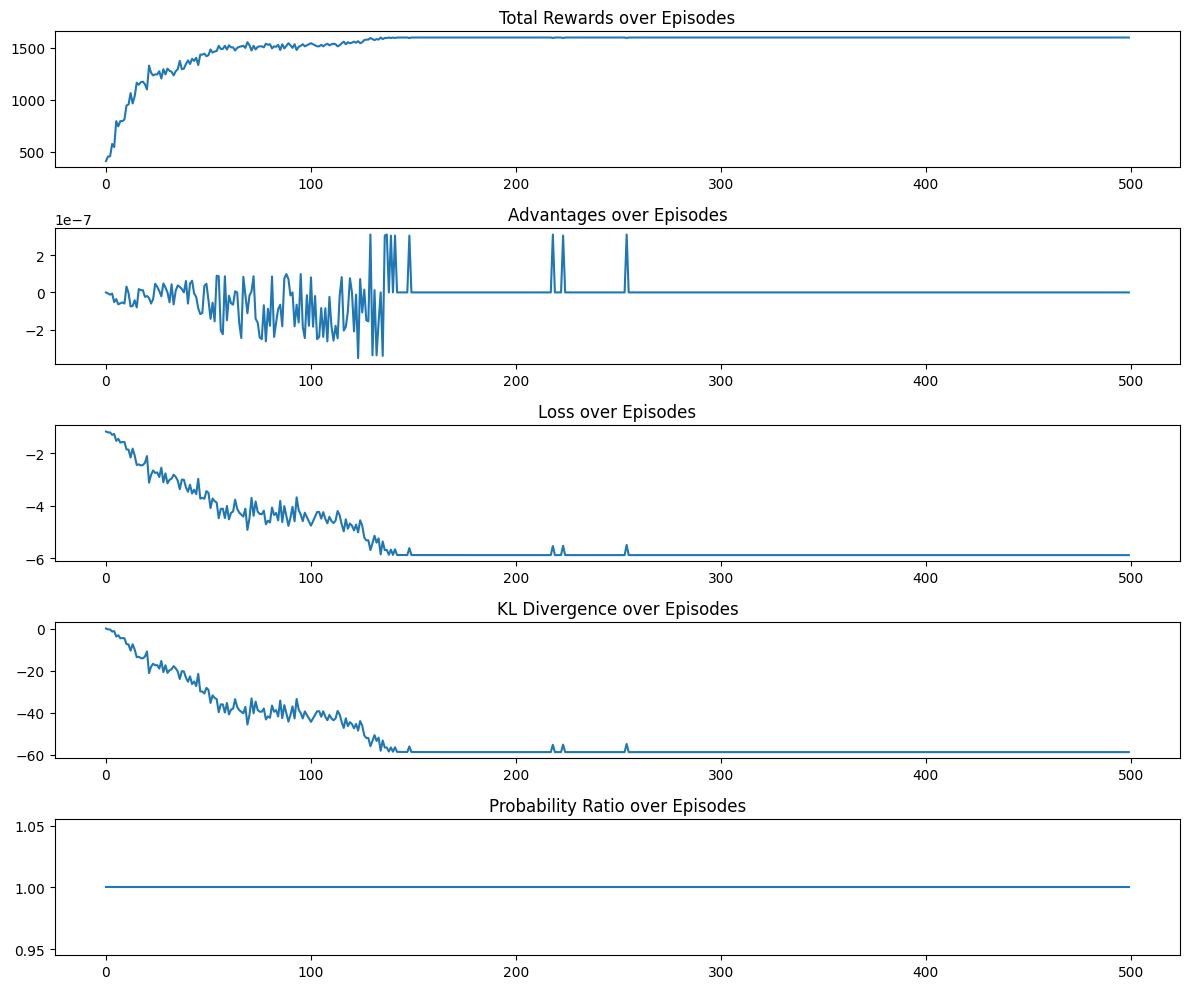


Playing with learned policy:
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream
I like ice cream


In [ ]:
#Updated Classical GRPO Implementation: Averaging Model Responses

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.special import softmax

# Set up environment parameters
completions = ["cream", "hockey", "donkey"]
completion_rewards = {"cream": 10, "hockey": 5, "donkey": -10}

# Hyperparameters
alpha = 0.001  # Learning rate
gamma = 0.99  # Discount factor
num_episodes = 500  # Number of training iterations
clip_epsilon = 0.4  # Clipping range for PPO-like optimization

# Dynamic temperature
initial_temperature = 10
temperature_decay = 0.999

# Gradient clipping value
gradient_clip = 0.5

# Batch size for policy updates
batch_size = 32

# Number of responses to average (for classical GRPO)
avg_responses = 5

# Entropy regularization coefficient
entropy_coeff = 0.02  # Weight for entropy bonus

# KL divergence weight
kl_beta = 0.1

# Reward normalization factor
reward_scaling = 0.1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Neural Network for GRPO
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize models
policy_model = PolicyNetwork(1, len(completions)).to(device)
reference_model = PolicyNetwork(1, len(completions)).to(device)
reference_model.load_state_dict(policy_model.state_dict())
reference_model.eval()  # Freeze reference model

# Optimizer and scheduler
optimizer = optim.Adam(policy_model.parameters(), lr=alpha)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)

def choose_action_with_averaging(state, model, n=avg_responses):
    input_tensor = torch.FloatTensor([state]).to(device)
    all_probs = []

    with torch.no_grad():
        for _ in range(n):
            logits = model(input_tensor)
            probabilities = torch.softmax(logits, dim=-1).cpu().numpy().flatten()
            all_probs.append(probabilities)

    # Print individual completions and write to file
    with open("completions_log.txt", "a") as f:
        for i, prob in enumerate(all_probs):
            completion = completions[np.argmax(prob)]
            log_message = f"Generated completion {i + 1}: {completion}, Probabilities: {prob}\n"
            print(log_message)
            f.write(log_message)

    actions = [np.random.choice(len(completions), p=prob) for prob in all_probs]

    return actions, all_probs

def get_reward(action):
    word = completions[action]
    return completion_rewards[word]

def compute_kl_divergence(new_probs, ref_probs):
    return (ref_probs * (torch.log(ref_probs + 1e-8) - torch.log(new_probs + 1e-8))).sum()

def compute_grpo_loss(old_probs, new_probs, ref_probs, rewards, clip_epsilon, beta):
    ratio = new_probs / old_probs

    # Normalize advantages (reward scaling)
    advantage = (rewards - rewards.mean()) / (rewards.std() + 1e-8)

    # Clipped surrogate loss
    clipped_ratio = torch.clamp(ratio, 1 - clip_epsilon, 1 + clip_epsilon)
    grpo_loss = -torch.min(ratio * advantage, clipped_ratio * advantage).mean()

    # KL divergence penalty
    kl_div = compute_kl_divergence(new_probs, ref_probs)

    # Entropy regularization
    entropy_loss = -(new_probs * torch.log(new_probs + 1e-8)).sum()

    total_loss = grpo_loss + beta * kl_div - entropy_coeff * entropy_loss

    return total_loss, kl_div, ratio

# Training loop
temperature = initial_temperature
state = 0

total_rewards = []
advantages = []
losses = []
kl_divergences = []
probability_ratios = []

for episode in range(num_episodes):
    batch_actions = []
    batch_old_probs = []
    batch_rewards = []

    for _ in range(batch_size):
        actions, all_probs = choose_action_with_averaging(state, policy_model)

        # Collect individual rewards and probabilities
        individual_rewards = [get_reward(action) for action in actions]

        batch_actions.extend(actions)
        batch_old_probs.extend([prob[action] for prob, action in zip(all_probs, actions)])
        batch_rewards.extend(individual_rewards)

    # Prepare tensors
    input_tensor = torch.FloatTensor([state]).to(device)

    # New policy probabilities
    logits = policy_model(input_tensor)
    new_probs = torch.softmax(logits, dim=-1)

    with torch.no_grad():
        ref_logits = reference_model(input_tensor)
        ref_probs = torch.softmax(ref_logits, dim=-1)

    print(f"Episode {episode} - New Probs: {new_probs.cpu().detach().numpy()}, Ref Probs: {ref_probs.cpu().detach().numpy()}")

    old_probs_tensor = torch.FloatTensor(batch_old_probs).to(device)
    reward_tensor = torch.FloatTensor(batch_rewards).to(device) * reward_scaling

    loss, kl_div, ratio = compute_grpo_loss(old_probs_tensor, new_probs[batch_actions], ref_probs[batch_actions], reward_tensor, clip_epsilon, kl_beta)

    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(policy_model.parameters(), gradient_clip)
    optimizer.step()

    scheduler.step()
    temperature *= temperature_decay

    total_rewards.append(sum(batch_rewards))
    advantages.append(((reward_tensor - reward_tensor.mean()) / (reward_tensor.std() + 1e-8)).mean().item())
    losses.append(loss.item())
    kl_divergences.append(kl_div.item())
    probability_ratios.append(ratio.mean().item())

# Display results
plt.figure(figsize=(12, 10))
plt.subplot(5, 1, 1)
plt.plot(total_rewards)
plt.title("Total Rewards over Episodes")
plt.subplot(5, 1, 2)
plt.plot(advantages)
plt.title("Advantages over Episodes")
plt.subplot(5, 1, 3)
plt.plot(losses)
plt.title("Loss over Episodes")
plt.subplot(5, 1, 4)
plt.plot(kl_divergences)
plt.title("KL Divergence over Episodes")
plt.subplot(5, 1, 5)
plt.plot(probability_ratios)
plt.title("Probability Ratio over Episodes")
plt.tight_layout()
plt.show()

def play_sentence_completion():
    print("\nPlaying with learned policy:")
    state = 0
    input_tensor = torch.FloatTensor([state]).to(device)
    logits = policy_model(input_tensor).detach().cpu().numpy()
    probabilities = softmax(logits)

    for _ in range(10):
        action = np.random.choice(len(completions), p=probabilities.flatten())
        print(f"I like ice {completions[action]}")

play_sentence_completion()
